In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Attacker agent benchmark comparison in presence of a basic defender

This notebooks can be run directly from VSCode, to generate a
traditional Jupyter Notebook to open in your browser
 you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

'Attacker agent benchmark comparison in presence of a basic defender\n\nThis notebooks can be run directly from VSCode, to generate a\ntraditional Jupyter Notebook to open in your browser\n you can run the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [2]:
import sys
import logging
import gym
import importlib

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.defender import ScanAndReimageCompromisedMachines
from cyberbattle._env.cyberbattle_env import AttackerGoal, DefenderConstraint, CyberBattleEnv
from typing import cast

importlib.reload(learner)
importlib.reload(p)
importlib.reload(p)

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline

In [ ]:
iteration_count = 600
training_episode_count = 10
plots_dir = "output/plots"

In [3]:
gym_env = gym.make(
    "CyberBattleChain-v0",
    size=10,
    attacker_goal=AttackerGoal(own_atleast=0, own_atleast_percent=1.0),
    defender_constraint=DefenderConstraint(maintain_sla=0.80),
    defender_agent=ScanAndReimageCompromisedMachines(probability=0.6, scan_capacity=2, scan_frequency=5),
).unwrapped

cyberbattlechain_defender = cast(CyberBattleEnv, gym_env)
assert isinstance(cyberbattlechain_defender, CyberBattleEnv)


ep = w.EnvironmentBounds.of_identifiers(maximum_total_credentials=22, maximum_node_count=22, identifiers=cyberbattlechain_defender.identifiers)

###### DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'dict'>`
  logger.warn(

Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00|

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:146: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)

Episode 1|Iteration 14|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 1|Iteration 17|reward:   20.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 1|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 54|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 1|Iteration 62|reward:  131.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 67|reward:  139.0|last_reward_at:   62|Elapsed Time: 0:00:00||


Episode 1|Iteration 67|reward:  139.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 1|Iteration 69|reward:  139.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 1|Iteration 70|reward:  145.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 1|Iteration 70|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 76|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 78|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 96|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 130|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 168|reward:  145.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 178|reward:  154.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 1|Iteration 178|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 1|Iteration 188|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 1|Iteration 194|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:01||


Episode 1|Iteration 227|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:02||


Episode 1|Iteration 228|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:02||


Episode 1|Iteration 229|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:03||


Episode 1|Iteration 230|reward:  154.0|last_reward_at:  178|Elapsed Time: 0:00:04||


Episode 1|Iteration 234|reward:  254.0|last_reward_at:  178|Elapsed Time: 0:00:04||


Episode 1|Iteration 234|reward:  254.0|last_reward_at:  234|Elapsed Time: 0:00:04||


Episode 1|Iteration 235|reward:  265.0|last_reward_at:  234|Elapsed Time: 0:00:04||


Episode 1|Iteration 235|reward:  265.0|last_reward_at:  235|Elapsed Time: 0:00:04||


Episode 1|Iteration 241|reward:  265.0|last_reward_at:  235|Elapsed Time: 0:00:04||


Episode 1|Iteration 247|reward:  265.0|last_reward_at:  235|Elapsed Time: 0:00:04||


Episode 1|Iteration 248|reward:  274.0|last_reward_at:  235|Elapsed Time: 0:00:04||


Episode 1|Iteration 248|reward:  274.0|last_reward_at:  248|Elapsed Time: 0:00:04||


Episode 1|Iteration 253|reward:  274.0|last_reward_at:  248|Elapsed Time: 0:00:04||


Episode 1|Iteration 258|reward:  274.0|last_reward_at:  248|Elapsed Time: 0:00:04||


Episode 1|Iteration 260|reward:  278.0|last_reward_at:  248|Elapsed Time: 0:00:04||


Episode 1|Iteration 260|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:04||


Episode 1|Iteration 263|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 268|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 273|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 276|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 281|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 287|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 291|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 294|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 300|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:05||


Episode 1|Iteration 304|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 307|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 312|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 316|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 319|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 322|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 327|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 332|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 337|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 342|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 1|Iteration 347|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 352|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 356|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 360|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 363|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 368|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 373|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 377|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 383|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 388|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:07||


Episode 1|Iteration 392|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 398|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 403|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 406|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 411|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 416|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 421|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 426|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 431|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:08||


Episode 1|Iteration 437|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:09||


Episode 1|Iteration 441|reward:  278.0|last_reward_at:  260|Elapsed Time: 0:00:09||


Episode 1|Iteration 445|reward:  280.0|last_reward_at:  260|Elapsed Time: 0:00:09||


Episode 1|Iteration 445|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 449|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 454|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 459|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 464|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 469|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 475|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 479|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 483|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 487|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:09||


Episode 1|Iteration 491|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 497|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 502|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 506|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 511|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 516|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 522|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 525|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 528|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 532|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:10||


Episode 1|Iteration 536|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 540|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 545|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 551|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 555|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 557|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 563|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 567|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:11||


Episode 1|Iteration 568|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:12||


Episode 1|Iteration 573|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:12||


Episode 1|Iteration 575|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:12||


Episode 1|Iteration 578|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:12||


Episode 1|Iteration 578|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:13||


Episode 1|Iteration 579|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:13||


Episode 1|Iteration 580|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||


Episode 1|Iteration 585|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||


Episode 1|Iteration 590|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||


Episode 1|Iteration 595|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||


Episode 1|Iteration 600|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||


Episode 1|Iteration 600|reward:  280.0|last_reward_at:  445|Elapsed Time: 0:00:15||

  Episode 1 stopped at t=600 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/67 (0.07)
    explore-remote: 5/222 (0.02)
    explore-connect: 2/252 (0.01)
    exploit-local: 0/13 (0.00)
    exploit-remote: 1/5 (0.17)
    exploit-connect: 0/28 (0.00)
  exploit deflected to exploration: 45
  ## Episode: 2/10 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 12|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 31|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 35|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 40|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 45|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 51|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 57|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 61|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 66|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 72|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 76|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 76|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 81|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 86|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 92|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 95|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 99|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 104|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 110|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 114|reward:   20.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 118|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:02||


Episode 2|Iteration 118|reward:  120.0|last_reward_at:  118|Elapsed Time: 0:00:02||


Episode 2|Iteration 122|reward:  120.0|last_reward_at:  118|Elapsed Time: 0:00:02||


Episode 2|Iteration 123|reward:  120.0|last_reward_at:  118|Elapsed Time: 0:00:02||


Episode 2|Iteration 127|reward:  134.0|last_reward_at:  118|Elapsed Time: 0:00:02||


Episode 2|Iteration 127|reward:  134.0|last_reward_at:  127|Elapsed Time: 0:00:02||


Episode 2|Iteration 129|reward:  140.0|last_reward_at:  127|Elapsed Time: 0:00:03||


Episode 2|Iteration 129|reward:  140.0|last_reward_at:  129|Elapsed Time: 0:00:03||


Episode 2|Iteration 130|reward:  146.0|last_reward_at:  129|Elapsed Time: 0:00:03||


Episode 2|Iteration 130|reward:  146.0|last_reward_at:  130|Elapsed Time: 0:00:03||


Episode 2|Iteration 135|reward:  146.0|last_reward_at:  130|Elapsed Time: 0:00:03||


Episode 2|Iteration 140|reward:  146.0|last_reward_at:  130|Elapsed Time: 0:00:03||


Episode 2|Iteration 145|reward:  146.0|last_reward_at:  130|Elapsed Time: 0:00:03||


Episode 2|Iteration 149|reward:  154.0|last_reward_at:  130|Elapsed Time: 0:00:03||


Episode 2|Iteration 149|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:03||


Episode 2|Iteration 154|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:03||


Episode 2|Iteration 159|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:03||


Episode 2|Iteration 164|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:03||


Episode 2|Iteration 168|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:03||


Episode 2|Iteration 169|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:04||


Episode 2|Iteration 170|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:05||


Episode 2|Iteration 172|reward:  154.0|last_reward_at:  149|Elapsed Time: 0:00:06||


Episode 2|Iteration 173|reward:  254.0|last_reward_at:  149|Elapsed Time: 0:00:06||


Episode 2|Iteration 173|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 179|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 183|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 187|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 190|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 195|reward:  254.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 197|reward:  265.0|last_reward_at:  173|Elapsed Time: 0:00:06||


Episode 2|Iteration 197|reward:  265.0|last_reward_at:  197|Elapsed Time: 0:00:06||


Episode 2|Iteration 200|reward:  265.0|last_reward_at:  197|Elapsed Time: 0:00:06||


Episode 2|Iteration 202|reward:  269.0|last_reward_at:  197|Elapsed Time: 0:00:06||


Episode 2|Iteration 202|reward:  269.0|last_reward_at:  202|Elapsed Time: 0:00:06||


Episode 2|Iteration 206|reward:  269.0|last_reward_at:  202|Elapsed Time: 0:00:06||


Episode 2|Iteration 211|reward:  269.0|last_reward_at:  202|Elapsed Time: 0:00:06||


Episode 2|Iteration 216|reward:  269.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 2|Iteration 221|reward:  269.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 2|Iteration 225|reward:  271.0|last_reward_at:  202|Elapsed Time: 0:00:07||


Episode 2|Iteration 225|reward:  271.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 230|reward:  271.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 235|reward:  271.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 240|reward:  271.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 244|reward:  271.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 245|reward:  280.0|last_reward_at:  225|Elapsed Time: 0:00:07||


Episode 2|Iteration 245|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:07||


Episode 2|Iteration 251|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:07||


Episode 2|Iteration 255|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:07||


Episode 2|Iteration 259|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:07||


Episode 2|Iteration 262|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 266|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 270|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 274|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 279|reward:  280.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 283|reward:  380.0|last_reward_at:  245|Elapsed Time: 0:00:08||


Episode 2|Iteration 283|reward:  380.0|last_reward_at:  283|Elapsed Time: 0:00:08||


Episode 2|Iteration 288|reward:  380.0|last_reward_at:  283|Elapsed Time: 0:00:08||


Episode 2|Iteration 293|reward:  380.0|last_reward_at:  283|Elapsed Time: 0:00:08||


Episode 2|Iteration 294|reward:  394.0|last_reward_at:  283|Elapsed Time: 0:00:08||


Episode 2|Iteration 294|reward:  394.0|last_reward_at:  294|Elapsed Time: 0:00:08||


Episode 2|Iteration 297|reward:  394.0|last_reward_at:  294|Elapsed Time: 0:00:08||


Episode 2|Iteration 301|reward:  394.0|last_reward_at:  294|Elapsed Time: 0:00:08||


Episode 2|Iteration 305|reward:  402.0|last_reward_at:  294|Elapsed Time: 0:00:08||


Episode 2|Iteration 305|reward:  402.0|last_reward_at:  305|Elapsed Time: 0:00:08||


Episode 2|Iteration 308|reward:  408.0|last_reward_at:  305|Elapsed Time: 0:00:09||


Episode 2|Iteration 308|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 312|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 316|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 321|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 326|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 331|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 335|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 339|reward:  408.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 341|reward:  508.0|last_reward_at:  308|Elapsed Time: 0:00:09||


Episode 2|Iteration 341|reward:  508.0|last_reward_at:  341|Elapsed Time: 0:00:09||


Episode 2|Iteration 342|reward:  508.0|last_reward_at:  341|Elapsed Time: 0:00:10||


Episode 2|Iteration 343|reward:  508.0|last_reward_at:  341|Elapsed Time: 0:00:10||


Episode 2|Iteration 344|reward:  522.0|last_reward_at:  341|Elapsed Time: 0:00:10||


Episode 2|Iteration 344|reward:  522.0|last_reward_at:  344|Elapsed Time: 0:00:10||


Episode 2|Iteration 348|reward:  526.0|last_reward_at:  344|Elapsed Time: 0:00:10||


Episode 2|Iteration 348|reward:  526.0|last_reward_at:  348|Elapsed Time: 0:00:10||


Episode 2|Iteration 352|reward:  526.0|last_reward_at:  348|Elapsed Time: 0:00:10||


Episode 2|Iteration 356|reward:  526.0|last_reward_at:  348|Elapsed Time: 0:00:11||


Episode 2|Iteration 358|reward:  526.0|last_reward_at:  348|Elapsed Time: 0:00:11||


Episode 2|Iteration 361|reward:  526.0|last_reward_at:  348|Elapsed Time: 0:00:11||


Episode 2|Iteration 364|reward:  528.0|last_reward_at:  348|Elapsed Time: 0:00:11||


Episode 2|Iteration 364|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:11||


Episode 2|Iteration 365|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:11||


Episode 2|Iteration 366|reward:  528.0|last_reward_at:  364|Elapsed Time: 0:00:12||


Episode 2|Iteration 367|reward:  628.0|last_reward_at:  364|Elapsed Time: 0:00:13||


Episode 2|Iteration 367|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:13||


Episode 2|Iteration 368|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:13||


Episode 2|Iteration 369|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:15||


Episode 2|Iteration 370|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:16||


Episode 2|Iteration 371|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:16||


Episode 2|Iteration 376|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:16||


Episode 2|Iteration 380|reward:  628.0|last_reward_at:  367|Elapsed Time: 0:00:16||


Episode 2|Iteration 383|reward:  642.0|last_reward_at:  367|Elapsed Time: 0:00:16||


Episode 2|Iteration 383|reward:  642.0|last_reward_at:  383|Elapsed Time: 0:00:16||


Episode 2|Iteration 385|reward:  648.0|last_reward_at:  383|Elapsed Time: 0:00:16||


Episode 2|Iteration 385|reward:  648.0|last_reward_at:  385|Elapsed Time: 0:00:16||


Episode 2|Iteration 390|reward:  648.0|last_reward_at:  385|Elapsed Time: 0:00:17||


Episode 2|Iteration 391|reward:  748.0|last_reward_at:  385|Elapsed Time: 0:00:17||


Episode 2|Iteration 391|reward:  748.0|last_reward_at:  391|Elapsed Time: 0:00:17||


Episode 2|Iteration 392|reward:  748.0|last_reward_at:  391|Elapsed Time: 0:00:17||


Episode 2|Iteration 397|reward:  762.0|last_reward_at:  391|Elapsed Time: 0:00:17||


Episode 2|Iteration 397|reward:  762.0|last_reward_at:  397|Elapsed Time: 0:00:17||


Episode 2|Iteration 398|reward:  862.0|last_reward_at:  397|Elapsed Time: 0:00:17||


Episode 2|Iteration 398|reward:  862.0|last_reward_at:  398|Elapsed Time: 0:00:17||


Episode 2|Iteration 399|reward:  864.0|last_reward_at:  398|Elapsed Time: 0:00:17||


Episode 2|Iteration 399|reward:  864.0|last_reward_at:  399|Elapsed Time: 0:00:17||


Episode 2|Iteration 402|reward:  875.0|last_reward_at:  399|Elapsed Time: 0:00:17||


Episode 2|Iteration 402|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:17||


Episode 2|Iteration 403|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:18||


Episode 2|Iteration 404|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 405|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 409|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 414|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 418|reward:  875.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 418|reward:  881.0|last_reward_at:  402|Elapsed Time: 0:00:19||


Episode 2|Iteration 418|reward:  881.0|last_reward_at:  418|Elapsed Time: 0:00:19||


Episode 2|Iteration 419|reward:  890.0|last_reward_at:  418|Elapsed Time: 0:00:19||


Episode 2|Iteration 419|reward:  890.0|last_reward_at:  419|Elapsed Time: 0:00:19||


Episode 2|Iteration 424|reward:  898.0|last_reward_at:  419|Elapsed Time: 0:00:19||


Episode 2|Iteration 424|reward:  898.0|last_reward_at:  424|Elapsed Time: 0:00:19||


Episode 2|Iteration 425|reward:  904.0|last_reward_at:  424|Elapsed Time: 0:00:19||


Episode 2|Iteration 425|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:19||


Episode 2|Iteration 426|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 430|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 433|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 437|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 441|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 445|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 449|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 453|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 458|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:20||


Episode 2|Iteration 463|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:21||


Episode 2|Iteration 467|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:21||


Episode 2|Iteration 471|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:21||


Episode 2|Iteration 475|reward:  904.0|last_reward_at:  425|Elapsed Time: 0:00:21||


Episode 2|Iteration 476|reward:  910.0|last_reward_at:  425|Elapsed Time: 0:00:21||


Episode 2|Iteration 476|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:21||


Episode 2|Iteration 482|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:21||


Episode 2|Iteration 487|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:21||


Episode 2|Iteration 491|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:21||


Episode 2|Iteration 496|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:21||


Episode 2|Iteration 502|reward:  910.0|last_reward_at:  476|Elapsed Time: 0:00:22||


Episode 2|Iteration 505|reward: 1010.0|last_reward_at:  476|Elapsed Time: 0:00:22||


Episode 2|Iteration 505|reward: 1010.0|last_reward_at:  505|Elapsed Time: 0:00:22||


Episode 2|Iteration 506|reward: 1012.0|last_reward_at:  505|Elapsed Time: 0:00:22||


Episode 2|Iteration 506|reward: 1012.0|last_reward_at:  506|Elapsed Time: 0:00:22||


Episode 2|Iteration 507|reward: 1026.0|last_reward_at:  506|Elapsed Time: 0:00:22||


Episode 2|Iteration 507|reward: 1026.0|last_reward_at:  507|Elapsed Time: 0:00:22||


Episode 2|Iteration 512|reward: 1026.0|last_reward_at:  507|Elapsed Time: 0:00:22||


Episode 2|Iteration 513|reward: 1026.0|last_reward_at:  507|Elapsed Time: 0:00:22||


Episode 2|Iteration 516|reward: 1126.0|last_reward_at:  507|Elapsed Time: 0:00:22||


Episode 2|Iteration 516|reward: 1126.0|last_reward_at:  516|Elapsed Time: 0:00:22||


Episode 2|Iteration 517|reward: 1126.0|last_reward_at:  516|Elapsed Time: 0:00:23||


Episode 2|Iteration 521|reward: 1137.0|last_reward_at:  516|Elapsed Time: 0:00:23||


Episode 2|Iteration 521|reward: 1137.0|last_reward_at:  521|Elapsed Time: 0:00:23||


Episode 2|Iteration 524|reward: 1146.0|last_reward_at:  521|Elapsed Time: 0:00:23||


Episode 2|Iteration 524|reward: 1146.0|last_reward_at:  524|Elapsed Time: 0:00:23||


Episode 2|Iteration 525|reward: 1146.0|last_reward_at:  524|Elapsed Time: 0:00:24||


Episode 2|Iteration 526|reward: 1146.0|last_reward_at:  524|Elapsed Time: 0:00:25||


Episode 2|Iteration 530|reward: 1154.0|last_reward_at:  524|Elapsed Time: 0:00:25||


Episode 2|Iteration 530|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:25||


Episode 2|Iteration 535|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:25||


Episode 2|Iteration 540|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:25||


Episode 2|Iteration 543|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:25||


Episode 2|Iteration 544|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:27||


Episode 2|Iteration 545|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:27||


Episode 2|Iteration 550|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:27||


Episode 2|Iteration 554|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:27||


Episode 2|Iteration 555|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:28||


Episode 2|Iteration 556|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:28||


Episode 2|Iteration 557|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:29||


Episode 2|Iteration 561|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:29||


Episode 2|Iteration 562|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:29||


Episode 2|Iteration 563|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:30||


Episode 2|Iteration 564|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:30||


Episode 2|Iteration 568|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 572|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 577|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 582|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 587|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 592|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 593|reward: 1154.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 594|reward: 1156.0|last_reward_at:  530|Elapsed Time: 0:00:31||


Episode 2|Iteration 594|reward: 1156.0|last_reward_at:  594|Elapsed Time: 0:00:31||


Episode 2|Iteration 595|reward: 1156.0|last_reward_at:  594|Elapsed Time: 0:00:32||


Episode 2|Iteration 600|reward: 1156.0|last_reward_at:  594|Elapsed Time: 0:00:32||


Episode 2|Iteration 600|reward: 1156.0|last_reward_at:  594|Elapsed Time: 0:00:32||

  Episode 2 stopped at t=600 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/88 (0.07)
    explore-remote: 15/170 (0.08)
    explore-connect: 2/203 (0.01)
    exploit-local: 8/12 (0.40)
    exploit-remote: 3/34 (0.08)
    exploit-connect: 7/51 (0.12)
  exploit deflected to exploration: 10
  ## Episode: 3/10 'DQL' ϵ=0.7294, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:   16.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 13|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 13|reward:  127.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 3|Iteration 15|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 3|Iteration 15|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 3|Iteration 18|reward:  141.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 3|Iteration 18|reward:  141.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 3|Iteration 21|reward:  150.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 3|Iteration 21|reward:  150.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 3|Iteration 22|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 3|Iteration 22|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 3|Iteration 23|reward:  264.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 3|Iteration 23|reward:  264.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 3|Iteration 28|reward:  264.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 3|Iteration 30|reward:  266.0|last_reward_at:   23|Elapsed Time: 0:00:01||


Episode 3|Iteration 30|reward:  266.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward:  270.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward:  270.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 38|reward:  270.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 43|reward:  270.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 48|reward:  270.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 53|reward:  370.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 53|reward:  370.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 3|Iteration 55|reward:  381.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 3|Iteration 55|reward:  381.0|last_reward_at:   55|Elapsed Time: 0:00:01||


Episode 3|Iteration 56|reward:  390.0|last_reward_at:   55|Elapsed Time: 0:00:01||


Episode 3|Iteration 56|reward:  390.0|last_reward_at:   56|Elapsed Time: 0:00:01||


Episode 3|Iteration 57|reward:  390.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 3|Iteration 61|reward:  390.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 3|Iteration 61|reward:  392.0|last_reward_at:   56|Elapsed Time: 0:00:02||


Episode 3|Iteration 61|reward:  392.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 3|Iteration 66|reward:  392.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 3|Iteration 70|reward:  492.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 3|Iteration 70|reward:  492.0|last_reward_at:   70|Elapsed Time: 0:00:02||


Episode 3|Iteration 71|reward:  492.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 3|Iteration 72|reward:  492.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 3|Iteration 73|reward:  506.0|last_reward_at:   70|Elapsed Time: 0:00:03||


Episode 3|Iteration 73|reward:  506.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 3|Iteration 74|reward:  606.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 3|Iteration 74|reward:  606.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 3|Iteration 76|reward:  620.0|last_reward_at:   74|Elapsed Time: 0:00:03||


Episode 3|Iteration 76|reward:  620.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 3|Iteration 77|reward:  620.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 3|Iteration 82|reward:  720.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 3|Iteration 82|reward:  720.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 3|Iteration 86|reward:  720.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 3|Iteration 88|reward:  720.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 3|Iteration 90|reward:  734.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 3|Iteration 90|reward:  734.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 3|Iteration 92|reward:  734.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 3|Iteration 94|reward:  834.0|last_reward_at:   90|Elapsed Time: 0:00:04||


Episode 3|Iteration 94|reward:  834.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 3|Iteration 96|reward:  848.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 3|Iteration 96|reward:  848.0|last_reward_at:   96|Elapsed Time: 0:00:04||


Episode 3|Iteration 97|reward:  850.0|last_reward_at:   96|Elapsed Time: 0:00:04||


Episode 3|Iteration 97|reward:  850.0|last_reward_at:   97|Elapsed Time: 0:00:04||


Episode 3|Iteration 98|reward:  858.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 3|Iteration 98|reward:  858.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 3|Iteration 100|reward:  858.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 3|Iteration 103|reward:  858.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 3|Iteration 107|reward:  858.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 3|Iteration 107|reward:  958.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 3|Iteration 107|reward:  958.0|last_reward_at:  107|Elapsed Time: 0:00:05||


Episode 3|Iteration 108|reward:  972.0|last_reward_at:  107|Elapsed Time: 0:00:05||


Episode 3|Iteration 108|reward:  972.0|last_reward_at:  108|Elapsed Time: 0:00:05||


Episode 3|Iteration 109|reward:  972.0|last_reward_at:  108|Elapsed Time: 0:00:06||


Episode 3|Iteration 110|reward:  972.0|last_reward_at:  108|Elapsed Time: 0:00:06||


Episode 3|Iteration 112|reward: 1072.0|last_reward_at:  108|Elapsed Time: 0:00:06||


Episode 3|Iteration 112|reward: 1072.0|last_reward_at:  112|Elapsed Time: 0:00:06||


Episode 3|Iteration 113|reward: 1072.0|last_reward_at:  112|Elapsed Time: 0:00:07||


Episode 3|Iteration 115|reward: 1078.0|last_reward_at:  112|Elapsed Time: 0:00:07||


Episode 3|Iteration 115|reward: 1078.0|last_reward_at:  115|Elapsed Time: 0:00:07||


Episode 3|Iteration 116|reward: 6078.0|last_reward_at:  115|Elapsed Time: 0:00:07||


Episode 3|Iteration 116|reward: 6078.0|last_reward_at:  116|Elapsed Time: 0:00:07||

  Episode 3 ended at t=116 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/17 (0.15)
    explore-remote: 8/29 (0.22)
    explore-connect: 1/24 (0.04)
    exploit-local: 9/3 (0.75)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 9/8 (0.53)
  exploit deflected to exploration: 6
  ## Episode: 4/10 'DQL' ϵ=0.7150, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 4|Iteration 19|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 4|Iteration 19|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 22|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 26|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 31|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 35|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 40|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 45|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 50|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 53|reward:   20.0|last_reward_at:   19|Elapsed Time: 0:00:02||


Episode 4|Iteration 54|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:02||


Episode 4|Iteration 54|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 4|Iteration 56|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 4|Iteration 59|reward:  120.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 4|Iteration 62|reward:  134.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 4|Iteration 62|reward:  134.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 65|reward:  134.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 67|reward:  134.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 72|reward:  134.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 73|reward:  140.0|last_reward_at:   62|Elapsed Time: 0:00:02||


Episode 4|Iteration 73|reward:  140.0|last_reward_at:   73|Elapsed Time: 0:00:02||


Episode 4|Iteration 79|reward:  140.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 4|Iteration 84|reward:  140.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 4|Iteration 84|reward:  146.0|last_reward_at:   73|Elapsed Time: 0:00:03||


Episode 4|Iteration 84|reward:  146.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 4|Iteration 86|reward:  154.0|last_reward_at:   84|Elapsed Time: 0:00:03||


Episode 4|Iteration 86|reward:  154.0|last_reward_at:   86|Elapsed Time: 0:00:03||


Episode 4|Iteration 91|reward:  154.0|last_reward_at:   86|Elapsed Time: 0:00:03||


Episode 4|Iteration 94|reward:  254.0|last_reward_at:   86|Elapsed Time: 0:00:03||


Episode 4|Iteration 94|reward:  254.0|last_reward_at:   94|Elapsed Time: 0:00:03||


Episode 4|Iteration 99|reward:  254.0|last_reward_at:   94|Elapsed Time: 0:00:03||


Episode 4|Iteration 100|reward:  268.0|last_reward_at:   94|Elapsed Time: 0:00:03||


Episode 4|Iteration 100|reward:  268.0|last_reward_at:  100|Elapsed Time: 0:00:03||


Episode 4|Iteration 104|reward:  368.0|last_reward_at:  100|Elapsed Time: 0:00:03||


Episode 4|Iteration 104|reward:  368.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 4|Iteration 107|reward:  382.0|last_reward_at:  104|Elapsed Time: 0:00:03||


Episode 4|Iteration 107|reward:  382.0|last_reward_at:  107|Elapsed Time: 0:00:03||


Episode 4|Iteration 109|reward:  382.0|last_reward_at:  107|Elapsed Time: 0:00:03||


Episode 4|Iteration 113|reward:  382.0|last_reward_at:  107|Elapsed Time: 0:00:03||


Episode 4|Iteration 118|reward:  382.0|last_reward_at:  107|Elapsed Time: 0:00:04||


Episode 4|Iteration 121|reward:  482.0|last_reward_at:  107|Elapsed Time: 0:00:04||


Episode 4|Iteration 121|reward:  482.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 4|Iteration 122|reward:  484.0|last_reward_at:  121|Elapsed Time: 0:00:04||


Episode 4|Iteration 122|reward:  484.0|last_reward_at:  122|Elapsed Time: 0:00:04||


Episode 4|Iteration 123|reward:  490.0|last_reward_at:  122|Elapsed Time: 0:00:04||


Episode 4|Iteration 123|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 4|Iteration 124|reward:  504.0|last_reward_at:  123|Elapsed Time: 0:00:04||


Episode 4|Iteration 124|reward:  504.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 4|Iteration 125|reward:  506.0|last_reward_at:  124|Elapsed Time: 0:00:04||


Episode 4|Iteration 125|reward:  506.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 4|Iteration 127|reward:  606.0|last_reward_at:  125|Elapsed Time: 0:00:04||


Episode 4|Iteration 127|reward:  606.0|last_reward_at:  127|Elapsed Time: 0:00:04||


Episode 4|Iteration 128|reward:  620.0|last_reward_at:  127|Elapsed Time: 0:00:04||


Episode 4|Iteration 128|reward:  620.0|last_reward_at:  128|Elapsed Time: 0:00:04||


Episode 4|Iteration 132|reward:  620.0|last_reward_at:  128|Elapsed Time: 0:00:04||


Episode 4|Iteration 135|reward:  620.0|last_reward_at:  128|Elapsed Time: 0:00:05||


Episode 4|Iteration 138|reward:  628.0|last_reward_at:  128|Elapsed Time: 0:00:05||


Episode 4|Iteration 138|reward:  628.0|last_reward_at:  138|Elapsed Time: 0:00:05||


Episode 4|Iteration 139|reward:  634.0|last_reward_at:  138|Elapsed Time: 0:00:05||


Episode 4|Iteration 139|reward:  634.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 4|Iteration 144|reward:  636.0|last_reward_at:  139|Elapsed Time: 0:00:05||


Episode 4|Iteration 144|reward:  636.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 4|Iteration 149|reward:  636.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 4|Iteration 151|reward:  736.0|last_reward_at:  144|Elapsed Time: 0:00:05||


Episode 4|Iteration 151|reward:  736.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 4|Iteration 153|reward:  750.0|last_reward_at:  151|Elapsed Time: 0:00:05||


Episode 4|Iteration 153|reward:  750.0|last_reward_at:  153|Elapsed Time: 0:00:05||


Episode 4|Iteration 154|reward:  750.0|last_reward_at:  153|Elapsed Time: 0:00:06||


Episode 4|Iteration 155|reward:  850.0|last_reward_at:  153|Elapsed Time: 0:00:07||


Episode 4|Iteration 155|reward:  850.0|last_reward_at:  155|Elapsed Time: 0:00:07||


Episode 4|Iteration 160|reward:  850.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 4|Iteration 160|reward:  861.0|last_reward_at:  155|Elapsed Time: 0:00:08||


Episode 4|Iteration 160|reward:  861.0|last_reward_at:  160|Elapsed Time: 0:00:08||


Episode 4|Iteration 161|reward: 5861.0|last_reward_at:  160|Elapsed Time: 0:00:08||


Episode 4|Iteration 161|reward: 5861.0|last_reward_at:  161|Elapsed Time: 0:00:08||

  Episode 4 ended at t=161 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/19 (0.17)
    explore-remote: 8/51 (0.14)
    explore-connect: 2/37 (0.05)
    exploit-local: 6/1 (0.86)
    exploit-remote: 1/6 (0.14)
    exploit-connect: 6/20 (0.23)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'DQL' ϵ=0.6955, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 11|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 5|Iteration 12|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 5|Iteration 12|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 5|Iteration 13|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 5|Iteration 15|reward:  146.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 5|Iteration 15|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 5|Iteration 19|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:02||


Episode 5|Iteration 20|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:03||


Episode 5|Iteration 21|reward:  146.0|last_reward_at:   15|Elapsed Time: 0:00:04||


Episode 5|Iteration 23|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:04||


Episode 5|Iteration 23|reward:  246.0|last_reward_at:   23|Elapsed Time: 0:00:04||


Episode 5|Iteration 26|reward:  260.0|last_reward_at:   23|Elapsed Time: 0:00:04||


Episode 5|Iteration 26|reward:  260.0|last_reward_at:   26|Elapsed Time: 0:00:04||


Episode 5|Iteration 28|reward:  262.0|last_reward_at:   26|Elapsed Time: 0:00:04||


Episode 5|Iteration 28|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:04||


Episode 5|Iteration 33|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:04||


Episode 5|Iteration 38|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:04||


Episode 5|Iteration 43|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:04||


Episode 5|Iteration 47|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:04||


Episode 5|Iteration 53|reward:  262.0|last_reward_at:   28|Elapsed Time: 0:00:05||


Episode 5|Iteration 55|reward:  266.0|last_reward_at:   28|Elapsed Time: 0:00:05||


Episode 5|Iteration 55|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:05||


Episode 5|Iteration 60|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:05||


Episode 5|Iteration 65|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:05||


Episode 5|Iteration 67|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:05||


Episode 5|Iteration 68|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:06||


Episode 5|Iteration 70|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:06||


Episode 5|Iteration 75|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:06||


Episode 5|Iteration 80|reward:  366.0|last_reward_at:   55|Elapsed Time: 0:00:06||


Episode 5|Iteration 80|reward:  366.0|last_reward_at:   80|Elapsed Time: 0:00:06||


Episode 5|Iteration 81|reward:  366.0|last_reward_at:   80|Elapsed Time: 0:00:07||


Episode 5|Iteration 82|reward:  366.0|last_reward_at:   80|Elapsed Time: 0:00:08||


Episode 5|Iteration 83|reward:  366.0|last_reward_at:   80|Elapsed Time: 0:00:08||


Episode 5|Iteration 85|reward:  380.0|last_reward_at:   80|Elapsed Time: 0:00:09||


Episode 5|Iteration 85|reward:  380.0|last_reward_at:   85|Elapsed Time: 0:00:09||


Episode 5|Iteration 88|reward:  480.0|last_reward_at:   85|Elapsed Time: 0:00:09||


Episode 5|Iteration 88|reward:  480.0|last_reward_at:   88|Elapsed Time: 0:00:09||


Episode 5|Iteration 89|reward:  486.0|last_reward_at:   88|Elapsed Time: 0:00:10||


Episode 5|Iteration 89|reward:  486.0|last_reward_at:   89|Elapsed Time: 0:00:10||


Episode 5|Iteration 90|reward:  497.0|last_reward_at:   89|Elapsed Time: 0:00:10||


Episode 5|Iteration 90|reward:  497.0|last_reward_at:   90|Elapsed Time: 0:00:10||


Episode 5|Iteration 95|reward:  497.0|last_reward_at:   90|Elapsed Time: 0:00:10||


Episode 5|Iteration 96|reward:  497.0|last_reward_at:   90|Elapsed Time: 0:00:11||


Episode 5|Iteration 97|reward:  503.0|last_reward_at:   90|Elapsed Time: 0:00:12||


Episode 5|Iteration 97|reward:  503.0|last_reward_at:   97|Elapsed Time: 0:00:12||


Episode 5|Iteration 98|reward:  503.0|last_reward_at:   97|Elapsed Time: 0:00:14||


Episode 5|Iteration 99|reward:  512.0|last_reward_at:   97|Elapsed Time: 0:00:14||


Episode 5|Iteration 99|reward:  512.0|last_reward_at:   99|Elapsed Time: 0:00:14||


Episode 5|Iteration 104|reward:  518.0|last_reward_at:   99|Elapsed Time: 0:00:14||


Episode 5|Iteration 104|reward:  518.0|last_reward_at:  104|Elapsed Time: 0:00:14||


Episode 5|Iteration 106|reward:  618.0|last_reward_at:  104|Elapsed Time: 0:00:14||


Episode 5|Iteration 106|reward:  618.0|last_reward_at:  106|Elapsed Time: 0:00:14||


Episode 5|Iteration 107|reward:  632.0|last_reward_at:  106|Elapsed Time: 0:00:14||


Episode 5|Iteration 107|reward:  632.0|last_reward_at:  107|Elapsed Time: 0:00:14||


Episode 5|Iteration 110|reward:  634.0|last_reward_at:  107|Elapsed Time: 0:00:14||


Episode 5|Iteration 110|reward:  634.0|last_reward_at:  110|Elapsed Time: 0:00:14||


Episode 5|Iteration 112|reward:  734.0|last_reward_at:  110|Elapsed Time: 0:00:14||


Episode 5|Iteration 112|reward:  734.0|last_reward_at:  112|Elapsed Time: 0:00:14||


Episode 5|Iteration 113|reward:  734.0|last_reward_at:  112|Elapsed Time: 0:00:15||


Episode 5|Iteration 114|reward:  748.0|last_reward_at:  112|Elapsed Time: 0:00:17||


Episode 5|Iteration 114|reward:  748.0|last_reward_at:  114|Elapsed Time: 0:00:17||


Episode 5|Iteration 115|reward:  748.0|last_reward_at:  114|Elapsed Time: 0:00:17||


Episode 5|Iteration 116|reward:  848.0|last_reward_at:  114|Elapsed Time: 0:00:19||


Episode 5|Iteration 116|reward:  848.0|last_reward_at:  116|Elapsed Time: 0:00:19||


Episode 5|Iteration 117|reward:  848.0|last_reward_at:  116|Elapsed Time: 0:00:20||


Episode 5|Iteration 118|reward:  848.0|last_reward_at:  116|Elapsed Time: 0:00:20||


Episode 5|Iteration 120|reward:  862.0|last_reward_at:  116|Elapsed Time: 0:00:20||


Episode 5|Iteration 120|reward:  862.0|last_reward_at:  120|Elapsed Time: 0:00:20||


Episode 5|Iteration 121|reward:  868.0|last_reward_at:  120|Elapsed Time: 0:00:21||


Episode 5|Iteration 121|reward:  868.0|last_reward_at:  121|Elapsed Time: 0:00:21||


Episode 5|Iteration 122|reward:  868.0|last_reward_at:  121|Elapsed Time: 0:00:21||


Episode 5|Iteration 124|reward:  868.0|last_reward_at:  121|Elapsed Time: 0:00:21||


Episode 5|Iteration 126|reward:  874.0|last_reward_at:  121|Elapsed Time: 0:00:21||


Episode 5|Iteration 126|reward:  874.0|last_reward_at:  126|Elapsed Time: 0:00:21||


Episode 5|Iteration 127|reward:  974.0|last_reward_at:  126|Elapsed Time: 0:00:21||


Episode 5|Iteration 127|reward:  974.0|last_reward_at:  127|Elapsed Time: 0:00:21||


Episode 5|Iteration 128|reward:  974.0|last_reward_at:  127|Elapsed Time: 0:00:22||


Episode 5|Iteration 130|reward:  988.0|last_reward_at:  127|Elapsed Time: 0:00:22||


Episode 5|Iteration 130|reward:  988.0|last_reward_at:  130|Elapsed Time: 0:00:22||


Episode 5|Iteration 131|reward:  988.0|last_reward_at:  130|Elapsed Time: 0:00:22||


Episode 5|Iteration 134|reward:  988.0|last_reward_at:  130|Elapsed Time: 0:00:22||


Episode 5|Iteration 137|reward:  988.0|last_reward_at:  130|Elapsed Time: 0:00:22||


Episode 5|Iteration 138|reward:  990.0|last_reward_at:  130|Elapsed Time: 0:00:22||


Episode 5|Iteration 138|reward:  990.0|last_reward_at:  138|Elapsed Time: 0:00:22||


Episode 5|Iteration 140|reward: 1090.0|last_reward_at:  138|Elapsed Time: 0:00:23||


Episode 5|Iteration 140|reward: 1090.0|last_reward_at:  140|Elapsed Time: 0:00:23||


Episode 5|Iteration 141|reward: 1104.0|last_reward_at:  140|Elapsed Time: 0:00:23||


Episode 5|Iteration 141|reward: 1104.0|last_reward_at:  141|Elapsed Time: 0:00:23||


Episode 5|Iteration 143|reward: 1112.0|last_reward_at:  141|Elapsed Time: 0:00:23||


Episode 5|Iteration 143|reward: 1112.0|last_reward_at:  143|Elapsed Time: 0:00:23||


Episode 5|Iteration 145|reward: 1118.0|last_reward_at:  143|Elapsed Time: 0:00:23||


Episode 5|Iteration 145|reward: 1118.0|last_reward_at:  145|Elapsed Time: 0:00:23||


Episode 5|Iteration 146|reward: 1218.0|last_reward_at:  145|Elapsed Time: 0:00:23||


Episode 5|Iteration 146|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:00:23||


Episode 5|Iteration 147|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:00:23||


Episode 5|Iteration 148|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:00:24||


Episode 5|Iteration 151|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:00:24||


Episode 5|Iteration 152|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:00:24||


Episode 5|Iteration 153|reward: 1232.0|last_reward_at:  146|Elapsed Time: 0:00:24||


Episode 5|Iteration 153|reward: 1232.0|last_reward_at:  153|Elapsed Time: 0:00:24||


Episode 5|Iteration 155|reward: 1232.0|last_reward_at:  153|Elapsed Time: 0:00:25||


Episode 5|Iteration 157|reward: 1232.0|last_reward_at:  153|Elapsed Time: 0:00:25||


Episode 5|Iteration 158|reward: 2232.0|last_reward_at:  153|Elapsed Time: 0:00:25||


Episode 5|Iteration 158|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:25||


Episode 5|Iteration 160|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:25||


Episode 5|Iteration 160|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:26||


Episode 5|Iteration 161|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:26||


Episode 5|Iteration 163|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:27||


Episode 5|Iteration 164|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:28||


Episode 5|Iteration 165|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:29||


Episode 5|Iteration 168|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:29||


Episode 5|Iteration 168|reward: 2232.0|last_reward_at:  158|Elapsed Time: 0:00:29||


Episode 5|Iteration 169|reward: 2234.0|last_reward_at:  158|Elapsed Time: 0:00:29||


Episode 5|Iteration 169|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:29||


Episode 5|Iteration 170|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:30||


Episode 5|Iteration 171|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:31||


Episode 5|Iteration 172|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:31||


Episode 5|Iteration 173|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:32||


Episode 5|Iteration 174|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:33||


Episode 5|Iteration 175|reward: 2234.0|last_reward_at:  169|Elapsed Time: 0:00:33||


Episode 5|Iteration 176|reward: 7234.0|last_reward_at:  169|Elapsed Time: 0:00:33||


Episode 5|Iteration 176|reward: 7234.0|last_reward_at:  176|Elapsed Time: 0:00:33||

  Episode 5 ended at t=176 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/27 (0.21)
    explore-remote: 12/28 (0.30)
    explore-connect: 1/54 (0.02)
    exploit-local: 8/0 (1.00)
    exploit-remote: 1/11 (0.08)
    exploit-connect: 11/16 (0.41)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'DQL' ϵ=0.6749, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 21|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 26|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 31|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 6|Iteration 31|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:02||


Episode 6|Iteration 32|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:02||


Episode 6|Iteration 36|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:02||


Episode 6|Iteration 39|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:03||


Episode 6|Iteration 44|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:03||


Episode 6|Iteration 44|reward:  232.0|last_reward_at:   44|Elapsed Time: 0:00:03||


Episode 6|Iteration 45|reward:  238.0|last_reward_at:   44|Elapsed Time: 0:00:03||


Episode 6|Iteration 45|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 50|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 54|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 58|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 61|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 65|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 69|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 73|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 76|reward:  238.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 76|reward:  244.0|last_reward_at:   45|Elapsed Time: 0:00:03||


Episode 6|Iteration 76|reward:  244.0|last_reward_at:   76|Elapsed Time: 0:00:03||


Episode 6|Iteration 79|reward:  244.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 6|Iteration 84|reward:  244.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 6|Iteration 84|reward:  246.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 6|Iteration 84|reward:  246.0|last_reward_at:   84|Elapsed Time: 0:00:04||


Episode 6|Iteration 88|reward:  246.0|last_reward_at:   84|Elapsed Time: 0:00:04||


Episode 6|Iteration 92|reward:  246.0|last_reward_at:   84|Elapsed Time: 0:00:04||


Episode 6|Iteration 92|reward:  260.0|last_reward_at:   84|Elapsed Time: 0:00:04||


Episode 6|Iteration 92|reward:  260.0|last_reward_at:   92|Elapsed Time: 0:00:04||


Episode 6|Iteration 95|reward:  360.0|last_reward_at:   92|Elapsed Time: 0:00:04||


Episode 6|Iteration 95|reward:  360.0|last_reward_at:   95|Elapsed Time: 0:00:04||


Episode 6|Iteration 96|reward:  374.0|last_reward_at:   95|Elapsed Time: 0:00:04||


Episode 6|Iteration 96|reward:  374.0|last_reward_at:   96|Elapsed Time: 0:00:04||


Episode 6|Iteration 98|reward:  380.0|last_reward_at:   96|Elapsed Time: 0:00:04||


Episode 6|Iteration 98|reward:  380.0|last_reward_at:   98|Elapsed Time: 0:00:04||


Episode 6|Iteration 99|reward:  382.0|last_reward_at:   98|Elapsed Time: 0:00:04||


Episode 6|Iteration 99|reward:  382.0|last_reward_at:   99|Elapsed Time: 0:00:04||


Episode 6|Iteration 104|reward:  382.0|last_reward_at:   99|Elapsed Time: 0:00:04||


Episode 6|Iteration 105|reward:  388.0|last_reward_at:   99|Elapsed Time: 0:00:04||


Episode 6|Iteration 105|reward:  388.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 6|Iteration 110|reward:  388.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 6|Iteration 112|reward:  396.0|last_reward_at:  105|Elapsed Time: 0:00:04||


Episode 6|Iteration 112|reward:  396.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 6|Iteration 114|reward:  402.0|last_reward_at:  112|Elapsed Time: 0:00:04||


Episode 6|Iteration 114|reward:  402.0|last_reward_at:  114|Elapsed Time: 0:00:04||


Episode 6|Iteration 118|reward:  402.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 6|Iteration 122|reward:  402.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 6|Iteration 126|reward:  402.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 6|Iteration 130|reward:  402.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 6|Iteration 134|reward:  404.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 6|Iteration 134|reward:  404.0|last_reward_at:  134|Elapsed Time: 0:00:05||


Episode 6|Iteration 139|reward:  404.0|last_reward_at:  134|Elapsed Time: 0:00:05||


Episode 6|Iteration 142|reward:  410.0|last_reward_at:  134|Elapsed Time: 0:00:05||


Episode 6|Iteration 142|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 6|Iteration 147|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 6|Iteration 152|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 6|Iteration 156|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:05||


Episode 6|Iteration 159|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 164|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 168|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 172|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 177|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 182|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 187|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 192|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 197|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 202|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:06||


Episode 6|Iteration 206|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 210|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 215|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 220|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 224|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 228|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 232|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 236|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 240|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 244|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:07||


Episode 6|Iteration 247|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 251|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 255|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 259|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 262|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 265|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 269|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 274|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 278|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 281|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:08||


Episode 6|Iteration 285|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:09||


Episode 6|Iteration 289|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:09||


Episode 6|Iteration 293|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:09||


Episode 6|Iteration 294|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:10||


Episode 6|Iteration 295|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 299|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 304|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 307|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 312|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 315|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:11||


Episode 6|Iteration 318|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:12||


Episode 6|Iteration 322|reward:  410.0|last_reward_at:  142|Elapsed Time: 0:00:12||


Episode 6|Iteration 324|reward:  510.0|last_reward_at:  142|Elapsed Time: 0:00:12||


Episode 6|Iteration 324|reward:  510.0|last_reward_at:  324|Elapsed Time: 0:00:12||


Episode 6|Iteration 325|reward:  524.0|last_reward_at:  324|Elapsed Time: 0:00:12||


Episode 6|Iteration 325|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 330|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 335|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 339|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 344|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 348|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 352|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:12||


Episode 6|Iteration 355|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 6|Iteration 358|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 6|Iteration 363|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 6|Iteration 367|reward:  524.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 6|Iteration 369|reward:  530.0|last_reward_at:  325|Elapsed Time: 0:00:13||


Episode 6|Iteration 369|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 373|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 376|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 380|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 384|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 388|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:13||


Episode 6|Iteration 392|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:14||


Episode 6|Iteration 397|reward:  530.0|last_reward_at:  369|Elapsed Time: 0:00:14||


Episode 6|Iteration 401|reward:  534.0|last_reward_at:  369|Elapsed Time: 0:00:14||


Episode 6|Iteration 401|reward:  534.0|last_reward_at:  401|Elapsed Time: 0:00:14||


Episode 6|Iteration 406|reward:  534.0|last_reward_at:  401|Elapsed Time: 0:00:14||


Episode 6|Iteration 407|reward:  536.0|last_reward_at:  401|Elapsed Time: 0:00:14||


Episode 6|Iteration 407|reward:  536.0|last_reward_at:  407|Elapsed Time: 0:00:14||


Episode 6|Iteration 408|reward:  536.0|last_reward_at:  407|Elapsed Time: 0:00:14||


Episode 6|Iteration 413|reward:  536.0|last_reward_at:  407|Elapsed Time: 0:00:14||


Episode 6|Iteration 417|reward:  636.0|last_reward_at:  407|Elapsed Time: 0:00:15||


Episode 6|Iteration 417|reward:  636.0|last_reward_at:  417|Elapsed Time: 0:00:15||


Episode 6|Iteration 418|reward:  650.0|last_reward_at:  417|Elapsed Time: 0:00:16||


Episode 6|Iteration 418|reward:  650.0|last_reward_at:  418|Elapsed Time: 0:00:16||


Episode 6|Iteration 419|reward:  650.0|last_reward_at:  418|Elapsed Time: 0:00:17||


Episode 6|Iteration 421|reward:  656.0|last_reward_at:  418|Elapsed Time: 0:00:17||


Episode 6|Iteration 421|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 426|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 429|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 433|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 436|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 441|reward:  656.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 445|reward:  756.0|last_reward_at:  421|Elapsed Time: 0:00:17||


Episode 6|Iteration 445|reward:  756.0|last_reward_at:  445|Elapsed Time: 0:00:17||


Episode 6|Iteration 446|reward: 5756.0|last_reward_at:  445|Elapsed Time: 0:00:17||


Episode 6|Iteration 446|reward: 5756.0|last_reward_at:  446|Elapsed Time: 0:00:17||

  Episode 6 ended at t=446 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/54 (0.10)
    explore-remote: 9/108 (0.08)
    explore-connect: 2/112 (0.02)
    exploit-local: 6/51 (0.11)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 4/89 (0.04)
  exploit deflected to exploration: 18
  ## Episode: 7/10 'DQL' ϵ=0.6258, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 7|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||


Episode 7|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 7|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 7|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:01||


Episode 7|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:01||


Episode 7|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:01||


Episode 7|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:01||


Episode 7|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 7|Iteration 7|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 7|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 7|Iteration 8|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 7|Iteration 8|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 7|Iteration 9|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 7|Iteration 9|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 7|Iteration 11|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 7|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 7|Iteration 12|reward:  370.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 7|Iteration 12|reward:  370.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 7|Iteration 13|reward:  376.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 7|Iteration 13|reward:  376.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 7|Iteration 18|reward:  376.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 7|Iteration 20|reward:  376.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 7|Iteration 21|reward:  378.0|last_reward_at:   13|Elapsed Time: 0:00:02||


Episode 7|Iteration 21|reward:  378.0|last_reward_at:   21|Elapsed Time: 0:00:02||


Episode 7|Iteration 26|reward:  378.0|last_reward_at:   21|Elapsed Time: 0:00:02||


Episode 7|Iteration 31|reward:  378.0|last_reward_at:   21|Elapsed Time: 0:00:02||


Episode 7|Iteration 35|reward:  378.0|last_reward_at:   21|Elapsed Time: 0:00:02||


Episode 7|Iteration 38|reward:  386.0|last_reward_at:   21|Elapsed Time: 0:00:02||


Episode 7|Iteration 38|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 43|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 48|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 53|reward:  386.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 55|reward:  388.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 55|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:02||


Episode 7|Iteration 60|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 7|Iteration 61|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 7|Iteration 64|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 7|Iteration 65|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 7|Iteration 67|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:03||


Episode 7|Iteration 68|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:04||


Episode 7|Iteration 72|reward:  488.0|last_reward_at:   55|Elapsed Time: 0:00:04||


Episode 7|Iteration 72|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:04||


Episode 7|Iteration 76|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:04||


Episode 7|Iteration 80|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:04||


Episode 7|Iteration 84|reward:  488.0|last_reward_at:   72|Elapsed Time: 0:00:04||


Episode 7|Iteration 87|reward:  502.0|last_reward_at:   72|Elapsed Time: 0:00:05||


Episode 7|Iteration 87|reward:  502.0|last_reward_at:   87|Elapsed Time: 0:00:05||


Episode 7|Iteration 92|reward:  502.0|last_reward_at:   87|Elapsed Time: 0:00:05||


Episode 7|Iteration 96|reward:  502.0|last_reward_at:   87|Elapsed Time: 0:00:05||


Episode 7|Iteration 98|reward:  504.0|last_reward_at:   87|Elapsed Time: 0:00:05||


Episode 7|Iteration 98|reward:  504.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 7|Iteration 101|reward:  604.0|last_reward_at:   98|Elapsed Time: 0:00:05||


Episode 7|Iteration 101|reward:  604.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 7|Iteration 106|reward:  618.0|last_reward_at:  101|Elapsed Time: 0:00:05||


Episode 7|Iteration 106|reward:  618.0|last_reward_at:  106|Elapsed Time: 0:00:05||


Episode 7|Iteration 108|reward:  624.0|last_reward_at:  106|Elapsed Time: 0:00:05||


Episode 7|Iteration 108|reward:  624.0|last_reward_at:  108|Elapsed Time: 0:00:05||


Episode 7|Iteration 112|reward:  626.0|last_reward_at:  108|Elapsed Time: 0:00:05||


Episode 7|Iteration 112|reward:  626.0|last_reward_at:  112|Elapsed Time: 0:00:05||


Episode 7|Iteration 114|reward:  726.0|last_reward_at:  112|Elapsed Time: 0:00:05||


Episode 7|Iteration 114|reward:  726.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 7|Iteration 116|reward:  740.0|last_reward_at:  114|Elapsed Time: 0:00:05||


Episode 7|Iteration 116|reward:  740.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 7|Iteration 117|reward:  840.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 7|Iteration 117|reward:  840.0|last_reward_at:  117|Elapsed Time: 0:00:05||


Episode 7|Iteration 119|reward:  854.0|last_reward_at:  117|Elapsed Time: 0:00:05||


Episode 7|Iteration 119|reward:  854.0|last_reward_at:  119|Elapsed Time: 0:00:05||


Episode 7|Iteration 121|reward: 5854.0|last_reward_at:  119|Elapsed Time: 0:00:05||


Episode 7|Iteration 121|reward: 5854.0|last_reward_at:  121|Elapsed Time: 0:00:05||

  Episode 7 ended at t=121 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 7/25 (0.22)
    explore-connect: 1/25 (0.04)
    exploit-local: 8/2 (0.80)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 6/27 (0.18)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'DQL' ϵ=0.6133, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 8|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:02||


Episode 8|Iteration 4|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:03||


Episode 8|Iteration 5|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:04||


Episode 8|Iteration 7|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:04||


Episode 8|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 8|Iteration 13|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 8|Iteration 17|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:04||


Episode 8|Iteration 17|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:04||


Episode 8|Iteration 18|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:04||


Episode 8|Iteration 18|reward:  130.0|last_reward_at:   18|Elapsed Time: 0:00:04||


Episode 8|Iteration 20|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:04||


Episode 8|Iteration 20|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:04||


Episode 8|Iteration 21|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:04||


Episode 8|Iteration 21|reward:  238.0|last_reward_at:   21|Elapsed Time: 0:00:04||


Episode 8|Iteration 22|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:04||


Episode 8|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:04||


Episode 8|Iteration 23|reward:  258.0|last_reward_at:   22|Elapsed Time: 0:00:04||


Episode 8|Iteration 23|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:04||


Episode 8|Iteration 24|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:00:04||


Episode 8|Iteration 24|reward:  358.0|last_reward_at:   24|Elapsed Time: 0:00:04||


Episode 8|Iteration 25|reward:  372.0|last_reward_at:   24|Elapsed Time: 0:00:05||


Episode 8|Iteration 25|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:05||


Episode 8|Iteration 26|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 8|Iteration 27|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:06||


Episode 8|Iteration 27|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:06||


Episode 8|Iteration 28|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:06||


Episode 8|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:06||


Episode 8|Iteration 29|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:06||


Episode 8|Iteration 29|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:06||


Episode 8|Iteration 30|reward:  600.0|last_reward_at:   29|Elapsed Time: 0:00:07||


Episode 8|Iteration 30|reward:  600.0|last_reward_at:   30|Elapsed Time: 0:00:07||


Episode 8|Iteration 35|reward:  600.0|last_reward_at:   30|Elapsed Time: 0:00:07||


Episode 8|Iteration 36|reward:  606.0|last_reward_at:   30|Elapsed Time: 0:00:07||


Episode 8|Iteration 36|reward:  606.0|last_reward_at:   36|Elapsed Time: 0:00:07||


Episode 8|Iteration 37|reward:  608.0|last_reward_at:   36|Elapsed Time: 0:00:07||


Episode 8|Iteration 37|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:07||


Episode 8|Iteration 38|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:08||


Episode 8|Iteration 39|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:09||


Episode 8|Iteration 40|reward:  608.0|last_reward_at:   37|Elapsed Time: 0:00:09||


Episode 8|Iteration 42|reward:  708.0|last_reward_at:   37|Elapsed Time: 0:00:09||


Episode 8|Iteration 42|reward:  708.0|last_reward_at:   42|Elapsed Time: 0:00:09||


Episode 8|Iteration 43|reward:  710.0|last_reward_at:   42|Elapsed Time: 0:00:10||


Episode 8|Iteration 43|reward:  710.0|last_reward_at:   43|Elapsed Time: 0:00:10||


Episode 8|Iteration 44|reward:  724.0|last_reward_at:   43|Elapsed Time: 0:00:10||


Episode 8|Iteration 44|reward:  724.0|last_reward_at:   44|Elapsed Time: 0:00:10||


Episode 8|Iteration 45|reward:  730.0|last_reward_at:   44|Elapsed Time: 0:00:10||


Episode 8|Iteration 45|reward:  730.0|last_reward_at:   45|Elapsed Time: 0:00:10||


Episode 8|Iteration 46|reward: 5730.0|last_reward_at:   45|Elapsed Time: 0:00:10||


Episode 8|Iteration 46|reward: 5730.0|last_reward_at:   46|Elapsed Time: 0:00:10||

  Episode 8 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/10 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 7/3 (0.70)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'DQL' ϵ=0.6086, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 9|Iteration 7|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 9|Iteration 12|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 16|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 21|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 25|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 31|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 35|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 35|reward:   20.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 9|Iteration 40|reward:   20.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 9|Iteration 45|reward:   20.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 9|Iteration 51|reward:   20.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 9|Iteration 52|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:01||


Episode 9|Iteration 52|reward:  120.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 9|Iteration 53|reward:  134.0|last_reward_at:   52|Elapsed Time: 0:00:01||


Episode 9|Iteration 53|reward:  134.0|last_reward_at:   53|Elapsed Time: 0:00:01||


Episode 9|Iteration 54|reward:  142.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 9|Iteration 54|reward:  142.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 9|Iteration 58|reward:  242.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 9|Iteration 58|reward:  242.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 9|Iteration 59|reward:  256.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 9|Iteration 59|reward:  256.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 9|Iteration 60|reward:  356.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 9|Iteration 60|reward:  356.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 9|Iteration 61|reward:  370.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 9|Iteration 61|reward:  370.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 9|Iteration 64|reward:  376.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 9|Iteration 64|reward:  376.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 9|Iteration 65|reward:  378.0|last_reward_at:   64|Elapsed Time: 0:00:02||


Episode 9|Iteration 65|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:00:02||


Episode 9|Iteration 66|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 9|Iteration 69|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 9|Iteration 73|reward:  384.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 9|Iteration 73|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 78|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 83|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 88|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 92|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 93|reward:  386.0|last_reward_at:   73|Elapsed Time: 0:00:04||


Episode 9|Iteration 93|reward:  386.0|last_reward_at:   93|Elapsed Time: 0:00:04||


Episode 9|Iteration 94|reward:  392.0|last_reward_at:   93|Elapsed Time: 0:00:04||


Episode 9|Iteration 94|reward:  392.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 9|Iteration 96|reward:  392.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 9|Iteration 97|reward:  400.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 9|Iteration 97|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:04||


Episode 9|Iteration 98|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 102|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 107|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 111|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 114|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 116|reward:  500.0|last_reward_at:   97|Elapsed Time: 0:00:05||


Episode 9|Iteration 116|reward:  500.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 9|Iteration 117|reward:  514.0|last_reward_at:  116|Elapsed Time: 0:00:05||


Episode 9|Iteration 117|reward:  514.0|last_reward_at:  117|Elapsed Time: 0:00:05||


Episode 9|Iteration 119|reward:  614.0|last_reward_at:  117|Elapsed Time: 0:00:05||


Episode 9|Iteration 119|reward:  614.0|last_reward_at:  119|Elapsed Time: 0:00:05||


Episode 9|Iteration 124|reward:  614.0|last_reward_at:  119|Elapsed Time: 0:00:05||


Episode 9|Iteration 127|reward:  628.0|last_reward_at:  119|Elapsed Time: 0:00:05||


Episode 9|Iteration 127|reward:  628.0|last_reward_at:  127|Elapsed Time: 0:00:05||


Episode 9|Iteration 129|reward:  630.0|last_reward_at:  127|Elapsed Time: 0:00:05||


Episode 9|Iteration 129|reward:  630.0|last_reward_at:  129|Elapsed Time: 0:00:05||


Episode 9|Iteration 134|reward:  630.0|last_reward_at:  129|Elapsed Time: 0:00:06||


Episode 9|Iteration 139|reward:  630.0|last_reward_at:  129|Elapsed Time: 0:00:06||


Episode 9|Iteration 143|reward:  730.0|last_reward_at:  129|Elapsed Time: 0:00:06||


Episode 9|Iteration 143|reward:  730.0|last_reward_at:  143|Elapsed Time: 0:00:06||


Episode 9|Iteration 144|reward:  736.0|last_reward_at:  143|Elapsed Time: 0:00:06||


Episode 9|Iteration 144|reward:  736.0|last_reward_at:  144|Elapsed Time: 0:00:06||


Episode 9|Iteration 147|reward:  742.0|last_reward_at:  144|Elapsed Time: 0:00:06||


Episode 9|Iteration 147|reward:  742.0|last_reward_at:  147|Elapsed Time: 0:00:06||


Episode 9|Iteration 151|reward: 5742.0|last_reward_at:  147|Elapsed Time: 0:00:06||


Episode 9|Iteration 151|reward: 5742.0|last_reward_at:  151|Elapsed Time: 0:00:06||

  Episode 9 ended at t=151 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/9 (0.31)
    explore-remote: 9/24 (0.27)
    explore-connect: 0/37 (0.00)
    exploit-local: 5/3 (0.62)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 6/49 (0.11)
  exploit deflected to exploration: 5
  ## Episode: 10/10 'DQL' ϵ=0.5934, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 10|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 10|Iteration 9|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 10|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 10|Iteration 12|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 10|Iteration 12|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 10|Iteration 14|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 10|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:01||


Episode 10|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:01||


Episode 10|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 10|Iteration 17|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 10|Iteration 17|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 10|Iteration 22|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 10|Iteration 23|reward:  372.0|last_reward_at:   17|Elapsed Time: 0:00:02||


Episode 10|Iteration 23|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:02||


Episode 10|Iteration 27|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:02||


Episode 10|Iteration 31|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:02||


Episode 10|Iteration 31|reward:  378.0|last_reward_at:   23|Elapsed Time: 0:00:02||


Episode 10|Iteration 31|reward:  378.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 10|Iteration 35|reward:  380.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 10|Iteration 35|reward:  380.0|last_reward_at:   35|Elapsed Time: 0:00:02||


Episode 10|Iteration 40|reward:  386.0|last_reward_at:   35|Elapsed Time: 0:00:02||


Episode 10|Iteration 40|reward:  386.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 46|reward:  386.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 48|reward:  386.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 51|reward:  386.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 57|reward:  386.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 59|reward:  394.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 10|Iteration 59|reward:  394.0|last_reward_at:   59|Elapsed Time: 0:00:02||


Episode 10|Iteration 60|reward:  394.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 10|Iteration 62|reward:  400.0|last_reward_at:   59|Elapsed Time: 0:00:03||


Episode 10|Iteration 62|reward:  400.0|last_reward_at:   62|Elapsed Time: 0:00:03||


Episode 10|Iteration 63|reward:  500.0|last_reward_at:   62|Elapsed Time: 0:00:03||


Episode 10|Iteration 63|reward:  500.0|last_reward_at:   63|Elapsed Time: 0:00:03||


Episode 10|Iteration 65|reward:  514.0|last_reward_at:   63|Elapsed Time: 0:00:03||


Episode 10|Iteration 65|reward:  514.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 10|Iteration 69|reward:  514.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 10|Iteration 73|reward:  514.0|last_reward_at:   65|Elapsed Time: 0:00:03||


Episode 10|Iteration 76|reward:  520.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 10|Iteration 76|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 80|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 84|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 88|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 92|reward:  520.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 92|reward:  620.0|last_reward_at:   76|Elapsed Time: 0:00:04||


Episode 10|Iteration 92|reward:  620.0|last_reward_at:   92|Elapsed Time: 0:00:04||


Episode 10|Iteration 94|reward:  634.0|last_reward_at:   92|Elapsed Time: 0:00:04||


Episode 10|Iteration 94|reward:  634.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 10|Iteration 99|reward:  634.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 10|Iteration 103|reward:  634.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 10|Iteration 107|reward:  634.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 10|Iteration 110|reward:  636.0|last_reward_at:   94|Elapsed Time: 0:00:04||


Episode 10|Iteration 110|reward:  636.0|last_reward_at:  110|Elapsed Time: 0:00:04||


Episode 10|Iteration 111|reward:  636.0|last_reward_at:  110|Elapsed Time: 0:00:05||


Episode 10|Iteration 112|reward:  636.0|last_reward_at:  110|Elapsed Time: 0:00:06||


Episode 10|Iteration 114|reward:  642.0|last_reward_at:  110|Elapsed Time: 0:00:06||


Episode 10|Iteration 114|reward:  642.0|last_reward_at:  114|Elapsed Time: 0:00:06||


Episode 10|Iteration 119|reward:  642.0|last_reward_at:  114|Elapsed Time: 0:00:06||


Episode 10|Iteration 122|reward:  642.0|last_reward_at:  114|Elapsed Time: 0:00:06||


Episode 10|Iteration 125|reward:  742.0|last_reward_at:  114|Elapsed Time: 0:00:06||


Episode 10|Iteration 125|reward:  742.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 10|Iteration 126|reward:  756.0|last_reward_at:  125|Elapsed Time: 0:00:06||


Episode 10|Iteration 126|reward:  756.0|last_reward_at:  126|Elapsed Time: 0:00:06||


Episode 10|Iteration 130|reward:  756.0|last_reward_at:  126|Elapsed Time: 0:00:07||


Episode 10|Iteration 130|reward:  758.0|last_reward_at:  126|Elapsed Time: 0:00:07||


Episode 10|Iteration 130|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:07||


Episode 10|Iteration 131|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:07||


Episode 10|Iteration 136|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:07||


Episode 10|Iteration 141|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:07||


Episode 10|Iteration 145|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:08||


Episode 10|Iteration 149|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:08||


Episode 10|Iteration 151|reward:  760.0|last_reward_at:  130|Elapsed Time: 0:00:08||


Episode 10|Iteration 151|reward:  760.0|last_reward_at:  151|Elapsed Time: 0:00:08||


Episode 10|Iteration 156|reward:  760.0|last_reward_at:  151|Elapsed Time: 0:00:08||


Episode 10|Iteration 160|reward:  760.0|last_reward_at:  151|Elapsed Time: 0:00:08||


Episode 10|Iteration 160|reward:  766.0|last_reward_at:  151|Elapsed Time: 0:00:08||


Episode 10|Iteration 160|reward:  766.0|last_reward_at:  160|Elapsed Time: 0:00:08||


Episode 10|Iteration 161|reward:  766.0|last_reward_at:  160|Elapsed Time: 0:00:09||


Episode 10|Iteration 162|reward:  866.0|last_reward_at:  160|Elapsed Time: 0:00:09||


Episode 10|Iteration 162|reward:  866.0|last_reward_at:  162|Elapsed Time: 0:00:09||


Episode 10|Iteration 163|reward:  866.0|last_reward_at:  162|Elapsed Time: 0:00:09||


Episode 10|Iteration 164|reward:  880.0|last_reward_at:  162|Elapsed Time: 0:00:09||


Episode 10|Iteration 164|reward:  880.0|last_reward_at:  164|Elapsed Time: 0:00:09||


Episode 10|Iteration 165|reward:  880.0|last_reward_at:  164|Elapsed Time: 0:00:11||


Episode 10|Iteration 166|reward:  886.0|last_reward_at:  164|Elapsed Time: 0:00:11||


Episode 10|Iteration 166|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:11||


Episode 10|Iteration 169|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:11||


Episode 10|Iteration 171|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:11||


Episode 10|Iteration 172|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:12||


Episode 10|Iteration 173|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:12||


Episode 10|Iteration 177|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:13||


Episode 10|Iteration 181|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:13||


Episode 10|Iteration 183|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:13||


Episode 10|Iteration 183|reward:  886.0|last_reward_at:  166|Elapsed Time: 0:00:13||


Episode 10|Iteration 186|reward:  888.0|last_reward_at:  166|Elapsed Time: 0:00:13||


Episode 10|Iteration 186|reward:  888.0|last_reward_at:  186|Elapsed Time: 0:00:13||


Episode 10|Iteration 190|reward:  888.0|last_reward_at:  186|Elapsed Time: 0:00:13||


Episode 10|Iteration 193|reward:  888.0|last_reward_at:  186|Elapsed Time: 0:00:13||


Episode 10|Iteration 195|reward:  988.0|last_reward_at:  186|Elapsed Time: 0:00:13||


Episode 10|Iteration 195|reward:  988.0|last_reward_at:  195|Elapsed Time: 0:00:13||


Episode 10|Iteration 197|reward:  988.0|last_reward_at:  195|Elapsed Time: 0:00:14||


Episode 10|Iteration 198|reward:  988.0|last_reward_at:  195|Elapsed Time: 0:00:14||


Episode 10|Iteration 199|reward:  988.0|last_reward_at:  195|Elapsed Time: 0:00:15||


Episode 10|Iteration 200|reward: 1002.0|last_reward_at:  195|Elapsed Time: 0:00:15||


Episode 10|Iteration 200|reward: 1002.0|last_reward_at:  200|Elapsed Time: 0:00:15||


Episode 10|Iteration 205|reward: 1002.0|last_reward_at:  200|Elapsed Time: 0:00:15||


Episode 10|Iteration 208|reward: 1102.0|last_reward_at:  200|Elapsed Time: 0:00:16||


Episode 10|Iteration 208|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 212|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 215|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 219|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 223|reward: 1102.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 225|reward: 1104.0|last_reward_at:  208|Elapsed Time: 0:00:16||


Episode 10|Iteration 225|reward: 1104.0|last_reward_at:  225|Elapsed Time: 0:00:16||


Episode 10|Iteration 226|reward: 1118.0|last_reward_at:  225|Elapsed Time: 0:00:16||


Episode 10|Iteration 226|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:16||


Episode 10|Iteration 229|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:16||


Episode 10|Iteration 230|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:17||


Episode 10|Iteration 231|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:17||


Episode 10|Iteration 232|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:17||


Episode 10|Iteration 236|reward: 1118.0|last_reward_at:  226|Elapsed Time: 0:00:17||


Episode 10|Iteration 239|reward: 1124.0|last_reward_at:  226|Elapsed Time: 0:00:17||


Episode 10|Iteration 239|reward: 1124.0|last_reward_at:  239|Elapsed Time: 0:00:17||


Episode 10|Iteration 242|reward: 1132.0|last_reward_at:  239|Elapsed Time: 0:00:18||


Episode 10|Iteration 242|reward: 1132.0|last_reward_at:  242|Elapsed Time: 0:00:18||


Episode 10|Iteration 243|reward: 1132.0|last_reward_at:  242|Elapsed Time: 0:00:19||


Episode 10|Iteration 244|reward: 1132.0|last_reward_at:  242|Elapsed Time: 0:00:19||


Episode 10|Iteration 249|reward: 1138.0|last_reward_at:  242|Elapsed Time: 0:00:19||


Episode 10|Iteration 249|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:19||


Episode 10|Iteration 251|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:19||


Episode 10|Iteration 251|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:19||


Episode 10|Iteration 252|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:20||


Episode 10|Iteration 253|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:20||


Episode 10|Iteration 254|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:20||


Episode 10|Iteration 259|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:20||


Episode 10|Iteration 259|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:21||


Episode 10|Iteration 260|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:21||


Episode 10|Iteration 261|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:22||


Episode 10|Iteration 262|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:23||


Episode 10|Iteration 263|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:23||


Episode 10|Iteration 266|reward: 1138.0|last_reward_at:  249|Elapsed Time: 0:00:23||


Episode 10|Iteration 266|reward: 1144.0|last_reward_at:  249|Elapsed Time: 0:00:24||


Episode 10|Iteration 266|reward: 1144.0|last_reward_at:  266|Elapsed Time: 0:00:24||


Episode 10|Iteration 268|reward: 1144.0|last_reward_at:  266|Elapsed Time: 0:00:25||


Episode 10|Iteration 269|reward: 1144.0|last_reward_at:  266|Elapsed Time: 0:00:25||


Episode 10|Iteration 270|reward: 1144.0|last_reward_at:  266|Elapsed Time: 0:00:25||


Episode 10|Iteration 274|reward: 1144.0|last_reward_at:  266|Elapsed Time: 0:00:25||


Episode 10|Iteration 276|reward: 6144.0|last_reward_at:  266|Elapsed Time: 0:00:25||


Episode 10|Iteration 276|reward: 6144.0|last_reward_at:  276|Elapsed Time: 0:00:25||

  Episode 10 ended at t=276 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/35 (0.12)
    explore-remote: 15/42 (0.26)
    explore-connect: 0/65 (0.00)
    exploit-local: 11/11 (0.50)
    exploit-remote: 1/13 (0.07)
    exploit-connect: 10/68 (0.13)
  exploit deflected to exploration: 6
simulation ended


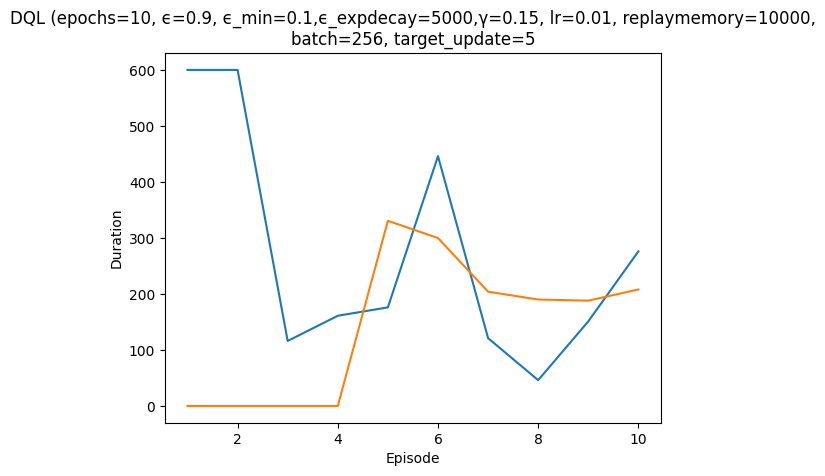

In [4]:
dqn_with_defender = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_defender,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.15, replay_memory_size=10000, target_update=5, batch_size=256, learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=600,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 1|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 1|Iteration 14|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 1|Iteration 15|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 1|Iteration 15|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 1|Iteration 16|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 1|Iteration 16|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 1|Iteration 19|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 1|Iteration 20|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 1|Iteration 25|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 1|Iteration 25|reward:  234.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 1|Iteration 26|reward:  248.0|last_reward_at:   25|Elapsed Time: 0:00:01||


Episode 1|Iteration 26|reward:  248.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 1|Iteration 27|reward:  348.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 1|Iteration 27|reward:  348.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 1|Iteration 28|reward:  362.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 1|Iteration 28|reward:  362.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 31|reward:  362.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 35|reward:  362.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 40|reward:  362.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 42|reward:  462.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 1|Iteration 42|reward:  462.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 1|Iteration 43|reward:  476.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 1|Iteration 43|reward:  476.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 1|Iteration 44|reward:  576.0|last_reward_at:   43|Elapsed Time: 0:00:01||


Episode 1|Iteration 44|reward:  576.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 1|Iteration 45|reward:  590.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 1|Iteration 45|reward:  590.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 1|Iteration 50|reward:  590.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 1|Iteration 51|reward:  690.0|last_reward_at:   45|Elapsed Time: 0:00:02||


Episode 1|Iteration 51|reward:  690.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 1|Iteration 52|reward:  704.0|last_reward_at:   51|Elapsed Time: 0:00:02||


Episode 1|Iteration 52|reward:  704.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 1|Iteration 53|reward:  804.0|last_reward_at:   52|Elapsed Time: 0:00:02||


Episode 1|Iteration 53|reward:  804.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 1|Iteration 54|reward:  818.0|last_reward_at:   53|Elapsed Time: 0:00:02||


Episode 1|Iteration 54|reward:  818.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 1|Iteration 57|reward:  918.0|last_reward_at:   54|Elapsed Time: 0:00:02||


Episode 1|Iteration 57|reward:  918.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 1|Iteration 58|reward:  932.0|last_reward_at:   57|Elapsed Time: 0:00:02||


Episode 1|Iteration 58|reward:  932.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 1|Iteration 59|reward:  932.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 1|Iteration 60|reward:  934.0|last_reward_at:   58|Elapsed Time: 0:00:02||


Episode 1|Iteration 60|reward:  934.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 1|Iteration 61|reward: 1034.0|last_reward_at:   60|Elapsed Time: 0:00:02||


Episode 1|Iteration 61|reward: 1034.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 1|Iteration 62|reward: 1034.0|last_reward_at:   61|Elapsed Time: 0:00:02||


Episode 1|Iteration 63|reward: 1048.0|last_reward_at:   61|Elapsed Time: 0:00:04||


Episode 1|Iteration 63|reward: 1048.0|last_reward_at:   63|Elapsed Time: 0:00:04||


Episode 1|Iteration 64|reward: 1148.0|last_reward_at:   63|Elapsed Time: 0:00:04||


Episode 1|Iteration 64|reward: 1148.0|last_reward_at:   64|Elapsed Time: 0:00:04||


Episode 1|Iteration 65|reward: 1162.0|last_reward_at:   64|Elapsed Time: 0:00:04||


Episode 1|Iteration 65|reward: 1162.0|last_reward_at:   65|Elapsed Time: 0:00:04||


Episode 1|Iteration 66|reward: 2162.0|last_reward_at:   65|Elapsed Time: 0:00:05||


Episode 1|Iteration 66|reward: 2162.0|last_reward_at:   66|Elapsed Time: 0:00:05||


Episode 1|Iteration 69|reward: 2162.0|last_reward_at:   66|Elapsed Time: 0:00:05||


Episode 1|Iteration 71|reward: 2162.0|last_reward_at:   66|Elapsed Time: 0:00:05||


Episode 1|Iteration 75|reward: 2162.0|last_reward_at:   66|Elapsed Time: 0:00:05||


Episode 1|Iteration 76|reward: 7162.0|last_reward_at:   66|Elapsed Time: 0:00:06||


Episode 1|Iteration 76|reward: 7162.0|last_reward_at:   76|Elapsed Time: 0:00:06||

  Episode 1 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/11 (0.21)
    exploit-connect: 12/38 (0.24)
  exploit deflected to exploration: 1
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 2|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 2|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 2|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 2|Iteration 8|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 12|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 2|Iteration 12|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 2|Iteration 13|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:  352.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 17|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 17|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:  466.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 21|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  580.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 2|Iteration 26|reward:  580.0|last_reward_at:   26|Elapsed Time: 0:00:00||


Episode 2|Iteration 28|reward:  594.0|last_reward_at:   26|Elapsed Time: 0:00:01||


Episode 2|Iteration 28|reward:  594.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 2|Iteration 29|reward:  694.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 2|Iteration 29|reward:  694.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 2|Iteration 30|reward:  708.0|last_reward_at:   29|Elapsed Time: 0:00:01||


Episode 2|Iteration 30|reward:  708.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 2|Iteration 31|reward:  808.0|last_reward_at:   30|Elapsed Time: 0:00:01||


Episode 2|Iteration 31|reward:  808.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 2|Iteration 32|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 2|Iteration 32|reward:  822.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 2|Iteration 33|reward:  922.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 2|Iteration 33|reward:  922.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 2|Iteration 34|reward:  936.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 2|Iteration 34|reward:  936.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 2|Iteration 36|reward: 5936.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 2|Iteration 36|reward: 5936.0|last_reward_at:   36|Elapsed Time: 0:00:01||

  Episode 2 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 9/1 (0.90)
    exploit-remote: 3/7 (0.30)
    exploit-connect: 8/8 (0.50)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 8|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 13|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 3|Iteration 14|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 3|Iteration 16|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  370.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  370.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  470.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 19|reward:  470.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 20|reward:  484.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 3|Iteration 20|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 3|Iteration 21|reward:  584.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 3|Iteration 21|reward:  584.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 3|Iteration 22|reward:  598.0|last_reward_at:   21|Elapsed Time: 0:00:00||


Episode 3|Iteration 22|reward:  598.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 3|Iteration 26|reward:  598.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 3|Iteration 27|reward:  698.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 3|Iteration 27|reward:  698.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 3|Iteration 28|reward:  712.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 3|Iteration 28|reward:  712.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 3|Iteration 30|reward:  714.0|last_reward_at:   28|Elapsed Time: 0:00:00||


Episode 3|Iteration 30|reward:  714.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 3|Iteration 31|reward:  814.0|last_reward_at:   30|Elapsed Time: 0:00:00||


Episode 3|Iteration 31|reward:  814.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 3|Iteration 32|reward:  828.0|last_reward_at:   31|Elapsed Time: 0:00:01||


Episode 3|Iteration 32|reward:  828.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 3|Iteration 33|reward:  928.0|last_reward_at:   32|Elapsed Time: 0:00:01||


Episode 3|Iteration 33|reward:  928.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward:  942.0|last_reward_at:   33|Elapsed Time: 0:00:01||


Episode 3|Iteration 34|reward:  942.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 38|reward:  942.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 40|reward: 1042.0|last_reward_at:   34|Elapsed Time: 0:00:01||


Episode 3|Iteration 40|reward: 1042.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 3|Iteration 42|reward: 1056.0|last_reward_at:   40|Elapsed Time: 0:00:01||


Episode 3|Iteration 42|reward: 1056.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 3|Iteration 44|reward: 1156.0|last_reward_at:   42|Elapsed Time: 0:00:01||


Episode 3|Iteration 44|reward: 1156.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 3|Iteration 45|reward: 1170.0|last_reward_at:   44|Elapsed Time: 0:00:01||


Episode 3|Iteration 45|reward: 1170.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 3|Iteration 46|reward: 6170.0|last_reward_at:   45|Elapsed Time: 0:00:01||


Episode 3|Iteration 46|reward: 6170.0|last_reward_at:   46|Elapsed Time: 0:00:01||

  Episode 3 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 3/3 (0.50)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 4|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 7|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 4|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 4|Iteration 12|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 4|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 4|Iteration 16|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 17|reward:  572.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 4|Iteration 17|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  586.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 4|Iteration 18|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  686.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 4|Iteration 19|reward:  686.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 4|Iteration 20|reward:  700.0|last_reward_at:   19|Elapsed Time: 0:00:01||


Episode 4|Iteration 20|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 4|Iteration 21|reward:  706.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 4|Iteration 21|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 4|Iteration 24|reward:  708.0|last_reward_at:   21|Elapsed Time: 0:00:01||


Episode 4|Iteration 24|reward:  708.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 4|Iteration 26|reward: 5708.0|last_reward_at:   24|Elapsed Time: 0:00:01||


Episode 4|Iteration 26|reward: 5708.0|last_reward_at:   26|Elapsed Time: 0:00:01||

  Episode 4 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 7/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 6/2 (0.75)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 7|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 12|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 16|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 19|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 23|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 27|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 31|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 35|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 40|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 45|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 50|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 54|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 57|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 61|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 65|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 69|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 73|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 78|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 82|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 5|Iteration 82|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:01||


Episode 5|Iteration 88|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:01||


Episode 5|Iteration 92|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 96|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 101|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 106|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 111|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 114|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 118|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 122|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 125|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 130|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 134|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:02||


Episode 5|Iteration 140|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 145|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 150|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 156|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 160|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 164|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 168|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 172|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 178|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 183|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:03||


Episode 5|Iteration 188|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 194|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 198|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 202|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 206|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 210|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 213|reward:   20.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 217|reward:  120.0|last_reward_at:   82|Elapsed Time: 0:00:04||


Episode 5|Iteration 217|reward:  120.0|last_reward_at:  217|Elapsed Time: 0:00:04||


Episode 5|Iteration 218|reward:  134.0|last_reward_at:  217|Elapsed Time: 0:00:04||


Episode 5|Iteration 218|reward:  134.0|last_reward_at:  218|Elapsed Time: 0:00:04||


Episode 5|Iteration 223|reward:  142.0|last_reward_at:  218|Elapsed Time: 0:00:04||


Episode 5|Iteration 223|reward:  142.0|last_reward_at:  223|Elapsed Time: 0:00:04||


Episode 5|Iteration 225|reward:  148.0|last_reward_at:  223|Elapsed Time: 0:00:04||


Episode 5|Iteration 225|reward:  148.0|last_reward_at:  225|Elapsed Time: 0:00:04||


Episode 5|Iteration 228|reward:  148.0|last_reward_at:  225|Elapsed Time: 0:00:04||


Episode 5|Iteration 231|reward:  148.0|last_reward_at:  225|Elapsed Time: 0:00:05||


Episode 5|Iteration 235|reward:  154.0|last_reward_at:  225|Elapsed Time: 0:00:05||


Episode 5|Iteration 235|reward:  154.0|last_reward_at:  235|Elapsed Time: 0:00:05||


Episode 5|Iteration 238|reward:  254.0|last_reward_at:  235|Elapsed Time: 0:00:05||


Episode 5|Iteration 238|reward:  254.0|last_reward_at:  238|Elapsed Time: 0:00:05||


Episode 5|Iteration 239|reward:  268.0|last_reward_at:  238|Elapsed Time: 0:00:05||


Episode 5|Iteration 239|reward:  268.0|last_reward_at:  239|Elapsed Time: 0:00:05||


Episode 5|Iteration 242|reward:  368.0|last_reward_at:  239|Elapsed Time: 0:00:05||


Episode 5|Iteration 242|reward:  368.0|last_reward_at:  242|Elapsed Time: 0:00:05||


Episode 5|Iteration 243|reward:  382.0|last_reward_at:  242|Elapsed Time: 0:00:05||


Episode 5|Iteration 243|reward:  382.0|last_reward_at:  243|Elapsed Time: 0:00:05||


Episode 5|Iteration 244|reward:  482.0|last_reward_at:  243|Elapsed Time: 0:00:05||


Episode 5|Iteration 244|reward:  482.0|last_reward_at:  244|Elapsed Time: 0:00:05||


Episode 5|Iteration 245|reward:  496.0|last_reward_at:  244|Elapsed Time: 0:00:05||


Episode 5|Iteration 245|reward:  496.0|last_reward_at:  245|Elapsed Time: 0:00:05||


Episode 5|Iteration 247|reward:  498.0|last_reward_at:  245|Elapsed Time: 0:00:05||


Episode 5|Iteration 247|reward:  498.0|last_reward_at:  247|Elapsed Time: 0:00:05||


Episode 5|Iteration 249|reward:  598.0|last_reward_at:  247|Elapsed Time: 0:00:05||


Episode 5|Iteration 249|reward:  598.0|last_reward_at:  249|Elapsed Time: 0:00:05||


Episode 5|Iteration 250|reward:  598.0|last_reward_at:  249|Elapsed Time: 0:00:05||


Episode 5|Iteration 251|reward:  612.0|last_reward_at:  249|Elapsed Time: 0:00:05||


Episode 5|Iteration 251|reward:  612.0|last_reward_at:  251|Elapsed Time: 0:00:05||


Episode 5|Iteration 252|reward:  712.0|last_reward_at:  251|Elapsed Time: 0:00:05||


Episode 5|Iteration 252|reward:  712.0|last_reward_at:  252|Elapsed Time: 0:00:05||


Episode 5|Iteration 253|reward:  726.0|last_reward_at:  252|Elapsed Time: 0:00:05||


Episode 5|Iteration 253|reward:  726.0|last_reward_at:  253|Elapsed Time: 0:00:05||


Episode 5|Iteration 254|reward:  826.0|last_reward_at:  253|Elapsed Time: 0:00:05||


Episode 5|Iteration 254|reward:  826.0|last_reward_at:  254|Elapsed Time: 0:00:05||


Episode 5|Iteration 255|reward:  840.0|last_reward_at:  254|Elapsed Time: 0:00:05||


Episode 5|Iteration 255|reward:  840.0|last_reward_at:  255|Elapsed Time: 0:00:05||


Episode 5|Iteration 256|reward:  940.0|last_reward_at:  255|Elapsed Time: 0:00:05||


Episode 5|Iteration 256|reward:  940.0|last_reward_at:  256|Elapsed Time: 0:00:05||


Episode 5|Iteration 257|reward:  954.0|last_reward_at:  256|Elapsed Time: 0:00:05||


Episode 5|Iteration 257|reward:  954.0|last_reward_at:  257|Elapsed Time: 0:00:05||


Episode 5|Iteration 260|reward: 1054.0|last_reward_at:  257|Elapsed Time: 0:00:06||


Episode 5|Iteration 260|reward: 1054.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 5|Iteration 263|reward: 1068.0|last_reward_at:  260|Elapsed Time: 0:00:06||


Episode 5|Iteration 263|reward: 1068.0|last_reward_at:  263|Elapsed Time: 0:00:06||


Episode 5|Iteration 264|reward: 1168.0|last_reward_at:  263|Elapsed Time: 0:00:06||


Episode 5|Iteration 264|reward: 1168.0|last_reward_at:  264|Elapsed Time: 0:00:06||


Episode 5|Iteration 265|reward: 1182.0|last_reward_at:  264|Elapsed Time: 0:00:06||


Episode 5|Iteration 265|reward: 1182.0|last_reward_at:  265|Elapsed Time: 0:00:06||


Episode 5|Iteration 266|reward: 2182.0|last_reward_at:  265|Elapsed Time: 0:00:06||


Episode 5|Iteration 266|reward: 2182.0|last_reward_at:  266|Elapsed Time: 0:00:06||


Episode 5|Iteration 270|reward: 2182.0|last_reward_at:  266|Elapsed Time: 0:00:06||


Episode 5|Iteration 273|reward: 2182.0|last_reward_at:  266|Elapsed Time: 0:00:06||


Episode 5|Iteration 275|reward: 2184.0|last_reward_at:  266|Elapsed Time: 0:00:06||


Episode 5|Iteration 275|reward: 2184.0|last_reward_at:  275|Elapsed Time: 0:00:06||


Episode 5|Iteration 276|reward: 7184.0|last_reward_at:  275|Elapsed Time: 0:00:07||


Episode 5|Iteration 276|reward: 7184.0|last_reward_at:  276|Elapsed Time: 0:00:07||

  Episode 5 ended at t=276 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 6/116 (0.05)
    exploit-connect: 12/129 (0.09)
  exploit deflected to exploration: 1
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 6|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 6|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 8|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 11|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  238.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:01||


Episode 6|Iteration 15|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 6|Iteration 16|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 6|Iteration 16|reward:  466.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 6|Iteration 17|reward:  480.0|last_reward_at:   16|Elapsed Time: 0:00:01||


Episode 6|Iteration 17|reward:  480.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 6|Iteration 18|reward:  580.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 6|Iteration 18|reward:  580.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 6|Iteration 20|reward:  594.0|last_reward_at:   18|Elapsed Time: 0:00:01||


Episode 6|Iteration 20|reward:  594.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 6|Iteration 23|reward:  594.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 6|Iteration 27|reward:  694.0|last_reward_at:   20|Elapsed Time: 0:00:01||


Episode 6|Iteration 27|reward:  694.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 6|Iteration 28|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:01||


Episode 6|Iteration 28|reward:  708.0|last_reward_at:   28|Elapsed Time: 0:00:01||


Episode 6|Iteration 30|reward:  808.0|last_reward_at:   28|Elapsed Time: 0:00:02||


Episode 6|Iteration 30|reward:  808.0|last_reward_at:   30|Elapsed Time: 0:00:02||


Episode 6|Iteration 31|reward:  822.0|last_reward_at:   30|Elapsed Time: 0:00:02||


Episode 6|Iteration 31|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 6|Iteration 36|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 6|Iteration 41|reward: 5822.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 6|Iteration 41|reward: 5822.0|last_reward_at:   41|Elapsed Time: 0:00:02||

  Episode 6 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 8/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 8/22 (0.27)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 7|Iteration 7|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 7|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 7|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 7|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 7|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 7|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 7|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 7|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 7|Iteration 11|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 7|Iteration 11|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 7|Iteration 12|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:01||


Episode 7|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 7|Iteration 13|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:01||


Episode 7|Iteration 13|reward:  570.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 7|Iteration 14|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:01||


Episode 7|Iteration 14|reward:  584.0|last_reward_at:   14|Elapsed Time: 0:00:01||


Episode 7|Iteration 15|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:01||


Episode 7|Iteration 15|reward:  684.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 7|Iteration 16|reward:  684.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 7|Iteration 20|reward:  684.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 7|Iteration 22|reward:  686.0|last_reward_at:   15|Elapsed Time: 0:00:01||


Episode 7|Iteration 22|reward:  686.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 7|Iteration 25|reward:  686.0|last_reward_at:   22|Elapsed Time: 0:00:01||


Episode 7|Iteration 29|reward:  686.0|last_reward_at:   22|Elapsed Time: 0:00:02||


Episode 7|Iteration 33|reward:  700.0|last_reward_at:   22|Elapsed Time: 0:00:02||


Episode 7|Iteration 33|reward:  700.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 7|Iteration 34|reward:  800.0|last_reward_at:   33|Elapsed Time: 0:00:02||


Episode 7|Iteration 34|reward:  800.0|last_reward_at:   34|Elapsed Time: 0:00:02||


Episode 7|Iteration 35|reward:  814.0|last_reward_at:   34|Elapsed Time: 0:00:02||


Episode 7|Iteration 35|reward:  814.0|last_reward_at:   35|Elapsed Time: 0:00:02||


Episode 7|Iteration 36|reward:  914.0|last_reward_at:   35|Elapsed Time: 0:00:02||


Episode 7|Iteration 36|reward:  914.0|last_reward_at:   36|Elapsed Time: 0:00:02||


Episode 7|Iteration 37|reward:  928.0|last_reward_at:   36|Elapsed Time: 0:00:02||


Episode 7|Iteration 37|reward:  928.0|last_reward_at:   37|Elapsed Time: 0:00:02||


Episode 7|Iteration 38|reward: 1028.0|last_reward_at:   37|Elapsed Time: 0:00:02||


Episode 7|Iteration 38|reward: 1028.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 39|reward: 1042.0|last_reward_at:   38|Elapsed Time: 0:00:02||


Episode 7|Iteration 39|reward: 1042.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 7|Iteration 40|reward: 1142.0|last_reward_at:   39|Elapsed Time: 0:00:02||


Episode 7|Iteration 40|reward: 1142.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 7|Iteration 41|reward: 1156.0|last_reward_at:   40|Elapsed Time: 0:00:02||


Episode 7|Iteration 41|reward: 1156.0|last_reward_at:   41|Elapsed Time: 0:00:02||


Episode 7|Iteration 42|reward: 2156.0|last_reward_at:   41|Elapsed Time: 0:00:02||


Episode 7|Iteration 42|reward: 2156.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 7|Iteration 44|reward: 2162.0|last_reward_at:   42|Elapsed Time: 0:00:02||


Episode 7|Iteration 44|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 7|Iteration 47|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 7|Iteration 50|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:02||


Episode 7|Iteration 53|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:03||


Episode 7|Iteration 54|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:03||


Episode 7|Iteration 57|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:04||


Episode 7|Iteration 60|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:04||


Episode 7|Iteration 64|reward: 2162.0|last_reward_at:   44|Elapsed Time: 0:00:04||


Episode 7|Iteration 66|reward: 7162.0|last_reward_at:   44|Elapsed Time: 0:00:04||


Episode 7|Iteration 66|reward: 7162.0|last_reward_at:   66|Elapsed Time: 0:00:04||

  Episode 7 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 12/39 (0.24)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 8|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 8|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 8|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 8|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 8|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 8|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 8|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 8|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 8|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 8|Iteration 11|reward:  570.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 8|Iteration 12|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 8|Iteration 13|reward:  684.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 8|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 8|Iteration 14|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 8|Iteration 16|reward:  798.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:  812.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:  812.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 8|Iteration 22|reward:  812.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 8|Iteration 26|reward: 5812.0|last_reward_at:   17|Elapsed Time: 0:00:01||


Episode 8|Iteration 26|reward: 5812.0|last_reward_at:   26|Elapsed Time: 0:00:01||

  Episode 8 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/10 (0.44)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||


Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:01||


Episode 9|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 9|Iteration 5|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:01||


Episode 9|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:01||


Episode 9|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:01||


Episode 9|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 9|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:01||


Episode 9|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 9|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:01||


Episode 9|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 9|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:01||


Episode 9|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 9|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:01||


Episode 9|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:01||


Episode 9|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:02||


Episode 9|Iteration 11|reward:  570.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 9|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:02||


Episode 9|Iteration 12|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:02||


Episode 9|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:02||


Episode 9|Iteration 13|reward:  684.0|last_reward_at:   13|Elapsed Time: 0:00:02||


Episode 9|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:02||


Episode 9|Iteration 14|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:02||


Episode 9|Iteration 15|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:02||


Episode 9|Iteration 15|reward:  798.0|last_reward_at:   15|Elapsed Time: 0:00:02||


Episode 9|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:02||


Episode 9|Iteration 16|reward:  812.0|last_reward_at:   16|Elapsed Time: 0:00:02||


Episode 9|Iteration 21|reward:  812.0|last_reward_at:   16|Elapsed Time: 0:00:02||


Episode 9|Iteration 26|reward:  812.0|last_reward_at:   16|Elapsed Time: 0:00:02||


Episode 9|Iteration 28|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:02||


Episode 9|Iteration 28|reward:  912.0|last_reward_at:   28|Elapsed Time: 0:00:02||


Episode 9|Iteration 29|reward:  926.0|last_reward_at:   28|Elapsed Time: 0:00:02||


Episode 9|Iteration 29|reward:  926.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 9|Iteration 30|reward: 1026.0|last_reward_at:   29|Elapsed Time: 0:00:02||


Episode 9|Iteration 30|reward: 1026.0|last_reward_at:   30|Elapsed Time: 0:00:02||


Episode 9|Iteration 31|reward: 1040.0|last_reward_at:   30|Elapsed Time: 0:00:02||


Episode 9|Iteration 31|reward: 1040.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 9|Iteration 34|reward: 1140.0|last_reward_at:   31|Elapsed Time: 0:00:02||


Episode 9|Iteration 34|reward: 1140.0|last_reward_at:   34|Elapsed Time: 0:00:02||


Episode 9|Iteration 35|reward: 1154.0|last_reward_at:   34|Elapsed Time: 0:00:02||


Episode 9|Iteration 35|reward: 1154.0|last_reward_at:   35|Elapsed Time: 0:00:02||


Episode 9|Iteration 36|reward: 1154.0|last_reward_at:   35|Elapsed Time: 0:00:03||


Episode 9|Iteration 38|reward: 2154.0|last_reward_at:   35|Elapsed Time: 0:00:03||


Episode 9|Iteration 38|reward: 2154.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 9|Iteration 41|reward: 7154.0|last_reward_at:   38|Elapsed Time: 0:00:03||


Episode 9|Iteration 41|reward: 7154.0|last_reward_at:   41|Elapsed Time: 0:00:03||

  Episode 9 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/18 (0.38)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 10|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 10|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 9|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 10|Iteration 9|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 10|Iteration 10|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 10|Iteration 10|reward:  456.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 10|Iteration 11|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  570.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 13|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 14|reward:  684.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 10|Iteration 14|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 10|Iteration 15|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 10|Iteration 15|reward:  698.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  798.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  798.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 21|reward: 5798.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 21|reward: 5798.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 10 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 8/1 (0.89)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/5 (0.58)
  exploit deflected to exploration: 0
simulation ended


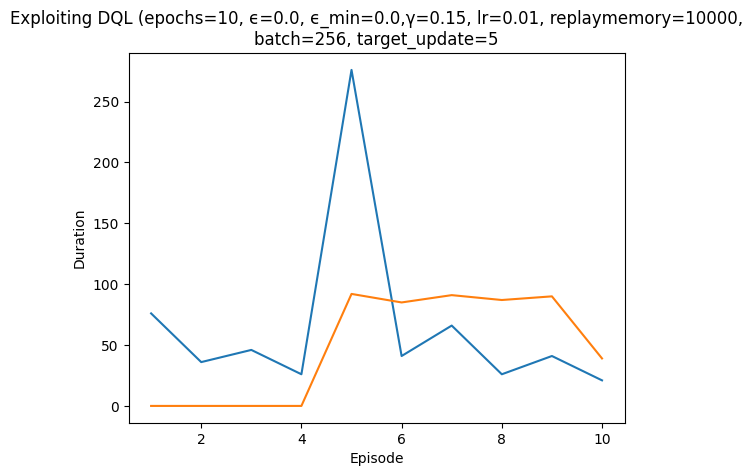

In [5]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=dqn_with_defender["learner"],
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    # render_last_episode_rewards_to='images/chain10',
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=600,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 



Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 1|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 1|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 1|Iteration 9|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 29|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 1|Iteration 29|reward:  120.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 1|Iteration 55|reward:  131.0|last_reward_at:   29|Elapsed Time: 0:00:00||


Episode 1|Iteration 55|reward:  131.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  139.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 1|Iteration 57|reward:  139.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 58|reward:  145.0|last_reward_at:   57|Elapsed Time: 0:00:00||


Episode 1|Iteration 58|reward:  145.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 1|Iteration 81|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 1|Iteration 81|reward:  154.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 1|Iteration 82|reward:  254.0|last_reward_at:   81|Elapsed Time: 0:00:00||


Episode 1|Iteration 82|reward:  254.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 1|Iteration 107|reward:  254.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 1|Iteration 117|reward:  265.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 1|Iteration 117|reward:  265.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 1|Iteration 118|reward:  267.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 1|Iteration 118|reward:  267.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 1|Iteration 125|reward:  271.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 1|Iteration 125|reward:  271.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 1|Iteration 148|reward:  280.0|last_reward_at:  125|Elapsed Time: 0:00:00||


Episode 1|Iteration 148|reward:  280.0|last_reward_at:  148|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  380.0|last_reward_at:  148|Elapsed Time: 0:00:00||


Episode 1|Iteration 156|reward:  380.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 190|reward:  380.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 213|reward:  380.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 236|reward:  380.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 236|reward:  391.0|last_reward_at:  156|Elapsed Time: 0:00:00||


Episode 1|Iteration 236|reward:  391.0|last_reward_at:  236|Elapsed Time: 0:00:00||


Episode 1|Iteration 245|reward:  397.0|last_reward_at:  236|Elapsed Time: 0:00:00||


Episode 1|Iteration 245|reward:  397.0|last_reward_at:  245|Elapsed Time: 0:00:00||


Episode 1|Iteration 250|reward:  405.0|last_reward_at:  245|Elapsed Time: 0:00:00||


Episode 1|Iteration 250|reward:  405.0|last_reward_at:  250|Elapsed Time: 0:00:00||


Episode 1|Iteration 252|reward:  414.0|last_reward_at:  250|Elapsed Time: 0:00:00||


Episode 1|Iteration 252|reward:  414.0|last_reward_at:  252|Elapsed Time: 0:00:00||


Episode 1|Iteration 257|reward:  514.0|last_reward_at:  252|Elapsed Time: 0:00:00||


Episode 1|Iteration 257|reward:  514.0|last_reward_at:  257|Elapsed Time: 0:00:00||


Episode 1|Iteration 269|reward:  525.0|last_reward_at:  257|Elapsed Time: 0:00:00||


Episode 1|Iteration 269|reward:  525.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 1|Iteration 273|reward:  529.0|last_reward_at:  269|Elapsed Time: 0:00:00||


Episode 1|Iteration 273|reward:  529.0|last_reward_at:  273|Elapsed Time: 0:00:00||


Episode 1|Iteration 278|reward:  531.0|last_reward_at:  273|Elapsed Time: 0:00:00||


Episode 1|Iteration 278|reward:  531.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 1|Iteration 282|reward:  540.0|last_reward_at:  278|Elapsed Time: 0:00:00||


Episode 1|Iteration 282|reward:  540.0|last_reward_at:  282|Elapsed Time: 0:00:00||


Episode 1|Iteration 288|reward:  640.0|last_reward_at:  282|Elapsed Time: 0:00:00||


Episode 1|Iteration 288|reward:  640.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 1|Iteration 312|reward:  640.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 1|Iteration 313|reward:  654.0|last_reward_at:  288|Elapsed Time: 0:00:00||


Episode 1|Iteration 313|reward:  654.0|last_reward_at:  313|Elapsed Time: 0:00:00||


Episode 1|Iteration 324|reward:  754.0|last_reward_at:  313|Elapsed Time: 0:00:00||


Episode 1|Iteration 324|reward:  754.0|last_reward_at:  324|Elapsed Time: 0:00:00||


Episode 1|Iteration 335|reward:  754.0|last_reward_at:  324|Elapsed Time: 0:00:00||


Episode 1|Iteration 338|reward:  768.0|last_reward_at:  324|Elapsed Time: 0:00:00||


Episode 1|Iteration 338|reward:  768.0|last_reward_at:  338|Elapsed Time: 0:00:00||


Episode 1|Iteration 342|reward:  868.0|last_reward_at:  338|Elapsed Time: 0:00:00||


Episode 1|Iteration 342|reward:  868.0|last_reward_at:  342|Elapsed Time: 0:00:00||


Episode 1|Iteration 347|reward:  882.0|last_reward_at:  342|Elapsed Time: 0:00:00||


Episode 1|Iteration 347|reward:  882.0|last_reward_at:  347|Elapsed Time: 0:00:00||


Episode 1|Iteration 348|reward:  888.0|last_reward_at:  347|Elapsed Time: 0:00:00||


Episode 1|Iteration 348|reward:  888.0|last_reward_at:  348|Elapsed Time: 0:00:00||


Episode 1|Iteration 349|reward:  894.0|last_reward_at:  348|Elapsed Time: 0:00:00||


Episode 1|Iteration 349|reward:  894.0|last_reward_at:  349|Elapsed Time: 0:00:00||


Episode 1|Iteration 352|reward:  900.0|last_reward_at:  349|Elapsed Time: 0:00:00||


Episode 1|Iteration 352|reward:  900.0|last_reward_at:  352|Elapsed Time: 0:00:00||


Episode 1|Iteration 373|reward:  900.0|last_reward_at:  352|Elapsed Time: 0:00:00||


Episode 1|Iteration 374|reward:  902.0|last_reward_at:  352|Elapsed Time: 0:00:00||


Episode 1|Iteration 374|reward:  902.0|last_reward_at:  374|Elapsed Time: 0:00:00||


Episode 1|Iteration 388|reward:  902.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 1|Iteration 390|reward:  910.0|last_reward_at:  374|Elapsed Time: 0:00:01||


Episode 1|Iteration 390|reward:  910.0|last_reward_at:  390|Elapsed Time: 0:00:01||


Episode 1|Iteration 399|reward:  916.0|last_reward_at:  390|Elapsed Time: 0:00:01||


Episode 1|Iteration 399|reward:  916.0|last_reward_at:  399|Elapsed Time: 0:00:01||


Episode 1|Iteration 418|reward:  916.0|last_reward_at:  399|Elapsed Time: 0:00:01||


Episode 1|Iteration 426|reward: 5916.0|last_reward_at:  399|Elapsed Time: 0:00:01||


Episode 1|Iteration 426|reward: 5916.0|last_reward_at:  426|Elapsed Time: 0:00:01||

  Episode 1 ended at t=426 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 13/121 (0.10)
    explore-remote: 16/238 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/31 (0.18)
  exploit deflected to exploration: 12
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8667, 



Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 2|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:   16.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 2|Iteration 20|reward:   16.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 2|Iteration 27|reward:   20.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 32|reward:  120.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 2|Iteration 32|reward:  120.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 2|Iteration 37|reward:  131.0|last_reward_at:   32|Elapsed Time: 0:00:00||


Episode 2|Iteration 37|reward:  131.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 2|Iteration 39|reward:  137.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 2|Iteration 39|reward:  137.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 2|Iteration 47|reward:  145.0|last_reward_at:   39|Elapsed Time: 0:00:00||


Episode 2|Iteration 47|reward:  145.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 2|Iteration 58|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 2|Iteration 58|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 2|Iteration 59|reward:  254.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 2|Iteration 59|reward:  254.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 2|Iteration 66|reward:  268.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 2|Iteration 66|reward:  268.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 2|Iteration 68|reward:  368.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 2|Iteration 68|reward:  368.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 2|Iteration 73|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||


Episode 2|Iteration 73|reward:  370.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 2|Iteration 74|reward:  372.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 2|Iteration 74|reward:  372.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 2|Iteration 92|reward:  372.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 2|Iteration 102|reward:  383.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 2|Iteration 102|reward:  383.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 2|Iteration 103|reward:  392.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 2|Iteration 103|reward:  392.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 2|Iteration 105|reward:  492.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 2|Iteration 105|reward:  492.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 2|Iteration 107|reward:  498.0|last_reward_at:  105|Elapsed Time: 0:00:00||


Episode 2|Iteration 107|reward:  498.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 2|Iteration 109|reward:  504.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 2|Iteration 109|reward:  504.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 2|Iteration 130|reward:  504.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 2|Iteration 132|reward:  518.0|last_reward_at:  109|Elapsed Time: 0:00:00||


Episode 2|Iteration 132|reward:  518.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 2|Iteration 135|reward:  618.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 2|Iteration 135|reward:  618.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 2|Iteration 136|reward:  620.0|last_reward_at:  135|Elapsed Time: 0:00:00||


Episode 2|Iteration 136|reward:  620.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  626.0|last_reward_at:  136|Elapsed Time: 0:00:00||


Episode 2|Iteration 137|reward:  626.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 143|reward:  628.0|last_reward_at:  137|Elapsed Time: 0:00:00||


Episode 2|Iteration 143|reward:  628.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 2|Iteration 160|reward:  628.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 2|Iteration 166|reward: 5628.0|last_reward_at:  143|Elapsed Time: 0:00:00||


Episode 2|Iteration 166|reward: 5628.0|last_reward_at:  166|Elapsed Time: 0:00:00||

  Episode 2 ended at t=166 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/42 (0.16)
    explore-remote: 10/92 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/8 (0.43)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8541, 



Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 3|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 8|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 3|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 3|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 3|Iteration 12|reward:  129.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  137.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 3|Iteration 17|reward:  137.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 36|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 3|Iteration 36|reward:  146.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 3|Iteration 47|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||


Episode 3|Iteration 47|reward:  152.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 3|Iteration 89|reward:  252.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 3|Iteration 89|reward:  252.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 3|Iteration 97|reward:  263.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 3|Iteration 97|reward:  263.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 3|Iteration 101|reward:  267.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 3|Iteration 101|reward:  267.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 3|Iteration 107|reward:  269.0|last_reward_at:  101|Elapsed Time: 0:00:00||


Episode 3|Iteration 107|reward:  269.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 3|Iteration 118|reward:  278.0|last_reward_at:  107|Elapsed Time: 0:00:00||


Episode 3|Iteration 118|reward:  278.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 3|Iteration 131|reward:  378.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 3|Iteration 131|reward:  378.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 3|Iteration 160|reward:  378.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 3|Iteration 166|reward:  392.0|last_reward_at:  131|Elapsed Time: 0:00:00||


Episode 3|Iteration 166|reward:  392.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 3|Iteration 168|reward:  400.0|last_reward_at:  166|Elapsed Time: 0:00:00||


Episode 3|Iteration 168|reward:  400.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 3|Iteration 170|reward:  500.0|last_reward_at:  168|Elapsed Time: 0:00:00||


Episode 3|Iteration 170|reward:  500.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 3|Iteration 177|reward:  514.0|last_reward_at:  170|Elapsed Time: 0:00:00||


Episode 3|Iteration 177|reward:  514.0|last_reward_at:  177|Elapsed Time: 0:00:00||


Episode 3|Iteration 178|reward:  516.0|last_reward_at:  177|Elapsed Time: 0:00:00||


Episode 3|Iteration 178|reward:  516.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  616.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 3|Iteration 180|reward:  616.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 191|reward: 5616.0|last_reward_at:  180|Elapsed Time: 0:00:00||


Episode 3|Iteration 191|reward: 5616.0|last_reward_at:  191|Elapsed Time: 0:00:00||

  Episode 3 ended at t=191 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/59 (0.11)
    explore-remote: 9/104 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 11
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8398, 



Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 4|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 4|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 4|Iteration 22|reward:  118.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 4|Iteration 24|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 4|Iteration 24|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 4|Iteration 63|reward:  131.0|last_reward_at:   24|Elapsed Time: 0:00:00||


Episode 4|Iteration 63|reward:  131.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 4|Iteration 67|reward:  140.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 4|Iteration 67|reward:  140.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 4|Iteration 70|reward:  240.0|last_reward_at:   67|Elapsed Time: 0:00:00||


Episode 4|Iteration 70|reward:  240.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 4|Iteration 74|reward:  254.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 4|Iteration 74|reward:  254.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 4|Iteration 77|reward:  258.0|last_reward_at:   74|Elapsed Time: 0:00:00||


Episode 4|Iteration 77|reward:  258.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 4|Iteration 84|reward:  264.0|last_reward_at:   77|Elapsed Time: 0:00:00||


Episode 4|Iteration 84|reward:  264.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 4|Iteration 87|reward:  364.0|last_reward_at:   84|Elapsed Time: 0:00:00||


Episode 4|Iteration 87|reward:  364.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 4|Iteration 91|reward:  366.0|last_reward_at:   87|Elapsed Time: 0:00:00||


Episode 4|Iteration 91|reward:  366.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 4|Iteration 96|reward:  377.0|last_reward_at:   91|Elapsed Time: 0:00:00||


Episode 4|Iteration 96|reward:  377.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 4|Iteration 103|reward:  383.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 4|Iteration 103|reward:  383.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 4|Iteration 108|reward:  392.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 4|Iteration 108|reward:  392.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 4|Iteration 110|reward:  398.0|last_reward_at:  108|Elapsed Time: 0:00:00||


Episode 4|Iteration 110|reward:  398.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 4|Iteration 112|reward:  404.0|last_reward_at:  110|Elapsed Time: 0:00:00||


Episode 4|Iteration 112|reward:  404.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 4|Iteration 117|reward:  412.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 4|Iteration 117|reward:  412.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 4|Iteration 119|reward:  512.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 4|Iteration 119|reward:  512.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 4|Iteration 137|reward:  512.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 4|Iteration 152|reward:  512.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 4|Iteration 156|reward: 5512.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 4|Iteration 156|reward: 5512.0|last_reward_at:  156|Elapsed Time: 0:00:00||

  Episode 4 ended at t=156 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/38 (0.16)
    explore-remote: 9/91 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/7 (0.36)
  exploit deflected to exploration: 15
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8284, 



Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||


Episode 5|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||


Episode 5|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 5|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 5|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||


Episode 5|Iteration 10|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 11|reward:  148.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 5|Iteration 11|reward:  148.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 5|Iteration 12|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||


Episode 5|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 5|Iteration 31|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 5|Iteration 31|reward:  254.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 5|Iteration 40|reward:  268.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 5|Iteration 40|reward:  268.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 5|Iteration 42|reward:  270.0|last_reward_at:   40|Elapsed Time: 0:00:00||


Episode 5|Iteration 42|reward:  270.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 5|Iteration 45|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:00||


Episode 5|Iteration 45|reward:  370.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 5|Iteration 48|reward:  372.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 5|Iteration 48|reward:  372.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  383.0|last_reward_at:   48|Elapsed Time: 0:00:00||


Episode 5|Iteration 51|reward:  383.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 59|reward:  389.0|last_reward_at:   51|Elapsed Time: 0:00:00||


Episode 5|Iteration 59|reward:  389.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 5|Iteration 66|reward:  397.0|last_reward_at:   59|Elapsed Time: 0:00:00||


Episode 5|Iteration 66|reward:  397.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 5|Iteration 79|reward:  406.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 5|Iteration 79|reward:  406.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 5|Iteration 88|reward:  506.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 5|Iteration 88|reward:  506.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 5|Iteration 93|reward:  520.0|last_reward_at:   88|Elapsed Time: 0:00:00||


Episode 5|Iteration 93|reward:  520.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 5|Iteration 113|reward:  524.0|last_reward_at:   93|Elapsed Time: 0:00:00||


Episode 5|Iteration 113|reward:  524.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 5|Iteration 118|reward:  526.0|last_reward_at:  113|Elapsed Time: 0:00:00||


Episode 5|Iteration 118|reward:  526.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 5|Iteration 134|reward:  626.0|last_reward_at:  118|Elapsed Time: 0:00:00||


Episode 5|Iteration 134|reward:  626.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 5|Iteration 146|reward: 5626.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 5|Iteration 146|reward: 5626.0|last_reward_at:  146|Elapsed Time: 0:00:00||

  Episode 5 ended at t=146 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/36 (0.16)
    explore-remote: 11/74 (0.13)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 12
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8178, 



Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 6|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 6|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 10|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 6|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 6|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 6|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 6|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 6|Iteration 16|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 17|reward:  252.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 6|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 6|Iteration 18|reward:  256.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 6|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  262.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 6|Iteration 19|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 23|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 6|Iteration 23|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 6|Iteration 31|reward:  376.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 6|Iteration 31|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 6|Iteration 33|reward:  382.0|last_reward_at:   31|Elapsed Time: 0:00:00||


Episode 6|Iteration 33|reward:  382.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 6|Iteration 37|reward:  482.0|last_reward_at:   33|Elapsed Time: 0:00:00||


Episode 6|Iteration 37|reward:  482.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 6|Iteration 41|reward:  488.0|last_reward_at:   37|Elapsed Time: 0:00:00||


Episode 6|Iteration 41|reward:  488.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 6|Iteration 45|reward:  494.0|last_reward_at:   41|Elapsed Time: 0:00:00||


Episode 6|Iteration 45|reward:  494.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 6|Iteration 47|reward:  496.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 6|Iteration 47|reward:  496.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 6|Iteration 61|reward: 5496.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 6|Iteration 61|reward: 5496.0|last_reward_at:   61|Elapsed Time: 0:00:00||

  Episode 6 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/21 (0.22)
    explore-remote: 8/22 (0.27)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8134, 



Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 7|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 7|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 7|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 7|Iteration 9|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 7|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 7|Iteration 10|reward:  127.0|last_reward_at:    9|Elapsed Time: 0:00:00||


Episode 7|Iteration 10|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 7|Iteration 13|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||


Episode 7|Iteration 13|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  141.0|last_reward_at:   13|Elapsed Time: 0:00:00||


Episode 7|Iteration 15|reward:  141.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 7|Iteration 43|reward:  143.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 55|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 7|Iteration 55|reward:  152.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 7|Iteration 58|reward:  252.0|last_reward_at:   55|Elapsed Time: 0:00:00||


Episode 7|Iteration 58|reward:  252.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 7|Iteration 94|reward:  263.0|last_reward_at:   58|Elapsed Time: 0:00:00||


Episode 7|Iteration 94|reward:  263.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  267.0|last_reward_at:   94|Elapsed Time: 0:00:00||


Episode 7|Iteration 102|reward:  267.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 103|reward:  276.0|last_reward_at:  102|Elapsed Time: 0:00:00||


Episode 7|Iteration 103|reward:  276.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 7|Iteration 112|reward:  376.0|last_reward_at:  103|Elapsed Time: 0:00:00||


Episode 7|Iteration 112|reward:  376.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 7|Iteration 119|reward:  378.0|last_reward_at:  112|Elapsed Time: 0:00:00||


Episode 7|Iteration 119|reward:  378.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 7|Iteration 145|reward:  378.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 7|Iteration 149|reward:  389.0|last_reward_at:  119|Elapsed Time: 0:00:00||


Episode 7|Iteration 149|reward:  389.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 7|Iteration 152|reward:  397.0|last_reward_at:  149|Elapsed Time: 0:00:00||


Episode 7|Iteration 152|reward:  397.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 7|Iteration 175|reward:  397.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 7|Iteration 187|reward:  403.0|last_reward_at:  152|Elapsed Time: 0:00:00||


Episode 7|Iteration 187|reward:  403.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 213|reward:  403.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 228|reward:  403.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 244|reward:  403.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 266|reward:  403.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 272|reward:  412.0|last_reward_at:  187|Elapsed Time: 0:00:00||


Episode 7|Iteration 272|reward:  412.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 7|Iteration 274|reward:  512.0|last_reward_at:  272|Elapsed Time: 0:00:00||


Episode 7|Iteration 274|reward:  512.0|last_reward_at:  274|Elapsed Time: 0:00:00||


Episode 7|Iteration 289|reward:  512.0|last_reward_at:  274|Elapsed Time: 0:00:00||


Episode 7|Iteration 312|reward:  512.0|last_reward_at:  274|Elapsed Time: 0:00:00||


Episode 7|Iteration 323|reward:  526.0|last_reward_at:  274|Elapsed Time: 0:00:00||


Episode 7|Iteration 323|reward:  526.0|last_reward_at:  323|Elapsed Time: 0:00:00||


Episode 7|Iteration 330|reward:  626.0|last_reward_at:  323|Elapsed Time: 0:00:00||


Episode 7|Iteration 330|reward:  626.0|last_reward_at:  330|Elapsed Time: 0:00:00||


Episode 7|Iteration 341|reward: 5626.0|last_reward_at:  330|Elapsed Time: 0:00:00||


Episode 7|Iteration 341|reward: 5626.0|last_reward_at:  341|Elapsed Time: 0:00:00||

  Episode 7 ended at t=341 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/75 (0.11)
    explore-remote: 8/208 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/36 (0.12)
  exploit deflected to exploration: 36
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7895, 



Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 8|Iteration 17|reward:   14.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||


Episode 8|Iteration 18|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 19|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 8|Iteration 19|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 8|Iteration 45|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 8|Iteration 45|reward:  120.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 8|Iteration 60|reward:  131.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 8|Iteration 60|reward:  131.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 8|Iteration 65|reward:  137.0|last_reward_at:   60|Elapsed Time: 0:00:00||


Episode 8|Iteration 65|reward:  137.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 8|Iteration 66|reward:  145.0|last_reward_at:   65|Elapsed Time: 0:00:00||


Episode 8|Iteration 66|reward:  145.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 8|Iteration 69|reward:  154.0|last_reward_at:   66|Elapsed Time: 0:00:00||


Episode 8|Iteration 69|reward:  154.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 8|Iteration 70|reward:  254.0|last_reward_at:   69|Elapsed Time: 0:00:00||


Episode 8|Iteration 70|reward:  254.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 8|Iteration 84|reward:  254.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 8|Iteration 96|reward:  265.0|last_reward_at:   70|Elapsed Time: 0:00:00||


Episode 8|Iteration 96|reward:  265.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 8|Iteration 100|reward:  267.0|last_reward_at:   96|Elapsed Time: 0:00:00||


Episode 8|Iteration 100|reward:  267.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 8|Iteration 117|reward:  271.0|last_reward_at:  100|Elapsed Time: 0:00:00||


Episode 8|Iteration 117|reward:  271.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 8|Iteration 132|reward:  280.0|last_reward_at:  117|Elapsed Time: 0:00:00||


Episode 8|Iteration 132|reward:  280.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 8|Iteration 133|reward:  380.0|last_reward_at:  132|Elapsed Time: 0:00:00||


Episode 8|Iteration 133|reward:  380.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 8|Iteration 134|reward:  394.0|last_reward_at:  133|Elapsed Time: 0:00:00||


Episode 8|Iteration 134|reward:  394.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 8|Iteration 142|reward:  494.0|last_reward_at:  134|Elapsed Time: 0:00:00||


Episode 8|Iteration 142|reward:  494.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 8|Iteration 145|reward:  500.0|last_reward_at:  142|Elapsed Time: 0:00:00||


Episode 8|Iteration 145|reward:  500.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 8|Iteration 175|reward:  500.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 8|Iteration 178|reward:  506.0|last_reward_at:  145|Elapsed Time: 0:00:00||


Episode 8|Iteration 178|reward:  506.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 8|Iteration 191|reward:  520.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 8|Iteration 191|reward:  520.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 8|Iteration 192|reward:  522.0|last_reward_at:  191|Elapsed Time: 0:00:00||


Episode 8|Iteration 192|reward:  522.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 8|Iteration 199|reward:  622.0|last_reward_at:  192|Elapsed Time: 0:00:00||


Episode 8|Iteration 199|reward:  622.0|last_reward_at:  199|Elapsed Time: 0:00:00||


Episode 8|Iteration 201|reward:  628.0|last_reward_at:  199|Elapsed Time: 0:00:00||


Episode 8|Iteration 201|reward:  628.0|last_reward_at:  201|Elapsed Time: 0:00:00||


Episode 8|Iteration 204|reward:  630.0|last_reward_at:  201|Elapsed Time: 0:00:00||


Episode 8|Iteration 204|reward:  630.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 8|Iteration 221|reward:  630.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 8|Iteration 226|reward: 5630.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 8|Iteration 226|reward: 5630.0|last_reward_at:  226|Elapsed Time: 0:00:00||

  Episode 8 ended at t=226 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/44 (0.15)
    explore-remote: 10/136 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/22 (0.21)
  exploit deflected to exploration: 22
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7741, 



Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 9|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 7|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||


Episode 9|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 9|Iteration 14|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||


Episode 9|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 9|Iteration 20|reward:  127.0|last_reward_at:   14|Elapsed Time: 0:00:00||


Episode 9|Iteration 20|reward:  127.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 9|Iteration 22|reward:  135.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 9|Iteration 22|reward:  135.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 9|Iteration 23|reward:  137.0|last_reward_at:   22|Elapsed Time: 0:00:00||


Episode 9|Iteration 23|reward:  137.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 9|Iteration 25|reward:  143.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 9|Iteration 25|reward:  143.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 9|Iteration 34|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 9|Iteration 34|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 9|Iteration 35|reward:  252.0|last_reward_at:   34|Elapsed Time: 0:00:00||


Episode 9|Iteration 35|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 9|Iteration 43|reward:  266.0|last_reward_at:   35|Elapsed Time: 0:00:00||


Episode 9|Iteration 43|reward:  266.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 9|Iteration 44|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:00||


Episode 9|Iteration 44|reward:  366.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 9|Iteration 45|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:00||


Episode 9|Iteration 45|reward:  368.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 9|Iteration 47|reward:  370.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 9|Iteration 47|reward:  370.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 9|Iteration 69|reward:  370.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 9|Iteration 73|reward:  384.0|last_reward_at:   47|Elapsed Time: 0:00:00||


Episode 9|Iteration 73|reward:  384.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 9|Iteration 78|reward:  484.0|last_reward_at:   73|Elapsed Time: 0:00:00||


Episode 9|Iteration 78|reward:  484.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 9|Iteration 79|reward:  490.0|last_reward_at:   78|Elapsed Time: 0:00:00||


Episode 9|Iteration 79|reward:  490.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 9|Iteration 80|reward:  496.0|last_reward_at:   79|Elapsed Time: 0:00:00||


Episode 9|Iteration 80|reward:  496.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 9|Iteration 82|reward:  507.0|last_reward_at:   80|Elapsed Time: 0:00:00||


Episode 9|Iteration 82|reward:  507.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 9|Iteration 90|reward:  516.0|last_reward_at:   82|Elapsed Time: 0:00:00||


Episode 9|Iteration 90|reward:  516.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 9|Iteration 92|reward:  616.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 9|Iteration 92|reward:  616.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 9|Iteration 97|reward:  618.0|last_reward_at:   92|Elapsed Time: 0:00:00||


Episode 9|Iteration 97|reward:  618.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 9|Iteration 114|reward:  618.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 9|Iteration 120|reward:  620.0|last_reward_at:   97|Elapsed Time: 0:00:00||


Episode 9|Iteration 120|reward:  620.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 9|Iteration 137|reward:  620.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 9|Iteration 138|reward:  631.0|last_reward_at:  120|Elapsed Time: 0:00:00||


Episode 9|Iteration 138|reward:  631.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 9|Iteration 144|reward:  637.0|last_reward_at:  138|Elapsed Time: 0:00:00||


Episode 9|Iteration 144|reward:  637.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 9|Iteration 155|reward:  645.0|last_reward_at:  144|Elapsed Time: 0:00:00||


Episode 9|Iteration 155|reward:  645.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 9|Iteration 157|reward:  654.0|last_reward_at:  155|Elapsed Time: 0:00:00||


Episode 9|Iteration 157|reward:  654.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 9|Iteration 158|reward:  754.0|last_reward_at:  157|Elapsed Time: 0:00:00||


Episode 9|Iteration 158|reward:  754.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 9|Iteration 175|reward:  754.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 9|Iteration 178|reward:  768.0|last_reward_at:  158|Elapsed Time: 0:00:00||


Episode 9|Iteration 178|reward:  768.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 9|Iteration 181|reward:  770.0|last_reward_at:  178|Elapsed Time: 0:00:00||


Episode 9|Iteration 181|reward:  770.0|last_reward_at:  181|Elapsed Time: 0:00:00||


Episode 9|Iteration 182|reward:  870.0|last_reward_at:  181|Elapsed Time: 0:00:00||


Episode 9|Iteration 182|reward:  870.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 9|Iteration 183|reward:  881.0|last_reward_at:  182|Elapsed Time: 0:00:00||


Episode 9|Iteration 183|reward:  881.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 9|Iteration 198|reward:  881.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 9|Iteration 204|reward:  883.0|last_reward_at:  183|Elapsed Time: 0:00:00||


Episode 9|Iteration 204|reward:  883.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 9|Iteration 221|reward:  883.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 9|Iteration 230|reward:  889.0|last_reward_at:  204|Elapsed Time: 0:00:00||


Episode 9|Iteration 230|reward:  889.0|last_reward_at:  230|Elapsed Time: 0:00:00||


Episode 9|Iteration 244|reward:  889.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 9|Iteration 259|reward:  889.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 9|Iteration 274|reward:  889.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 9|Iteration 278|reward:  897.0|last_reward_at:  230|Elapsed Time: 0:00:01||


Episode 9|Iteration 278|reward:  897.0|last_reward_at:  278|Elapsed Time: 0:00:01||


Episode 9|Iteration 286|reward:  903.0|last_reward_at:  278|Elapsed Time: 0:00:01||


Episode 9|Iteration 286|reward:  903.0|last_reward_at:  286|Elapsed Time: 0:00:01||


Episode 9|Iteration 297|reward:  903.0|last_reward_at:  286|Elapsed Time: 0:00:01||


Episode 9|Iteration 306|reward: 5903.0|last_reward_at:  286|Elapsed Time: 0:00:01||


Episode 9|Iteration 306|reward: 5903.0|last_reward_at:  306|Elapsed Time: 0:00:01||

  Episode 9 ended at t=306 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/89 (0.12)
    explore-remote: 17/135 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/46 (0.13)
  exploit deflected to exploration: 31
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7538, 



Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||


Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||


Episode 10|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||


Episode 10|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||


Episode 10|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 15|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||


Episode 10|Iteration 15|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||


Episode 10|Iteration 16|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  240.0|last_reward_at:   16|Elapsed Time: 0:00:00||


Episode 10|Iteration 18|reward:  240.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 19|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||


Episode 10|Iteration 19|reward:  254.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  260.0|last_reward_at:   19|Elapsed Time: 0:00:00||


Episode 10|Iteration 20|reward:  260.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 23|reward:  360.0|last_reward_at:   20|Elapsed Time: 0:00:00||


Episode 10|Iteration 23|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 10|Iteration 25|reward:  366.0|last_reward_at:   23|Elapsed Time: 0:00:00||


Episode 10|Iteration 25|reward:  366.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 10|Iteration 27|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||


Episode 10|Iteration 27|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 10|Iteration 45|reward:  374.0|last_reward_at:   27|Elapsed Time: 0:00:00||


Episode 10|Iteration 45|reward:  374.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 10|Iteration 63|reward:  376.0|last_reward_at:   45|Elapsed Time: 0:00:00||


Episode 10|Iteration 63|reward:  376.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 10|Iteration 84|reward:  376.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 10|Iteration 89|reward:  390.0|last_reward_at:   63|Elapsed Time: 0:00:00||


Episode 10|Iteration 89|reward:  390.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 10|Iteration 90|reward:  490.0|last_reward_at:   89|Elapsed Time: 0:00:00||


Episode 10|Iteration 90|reward:  490.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 10|Iteration 91|reward: 5490.0|last_reward_at:   90|Elapsed Time: 0:00:00||


Episode 10|Iteration 91|reward: 5490.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 10 ended at t=91 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/24 (0.20)
    explore-remote: 7/40 (0.15)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 12
simulation ended


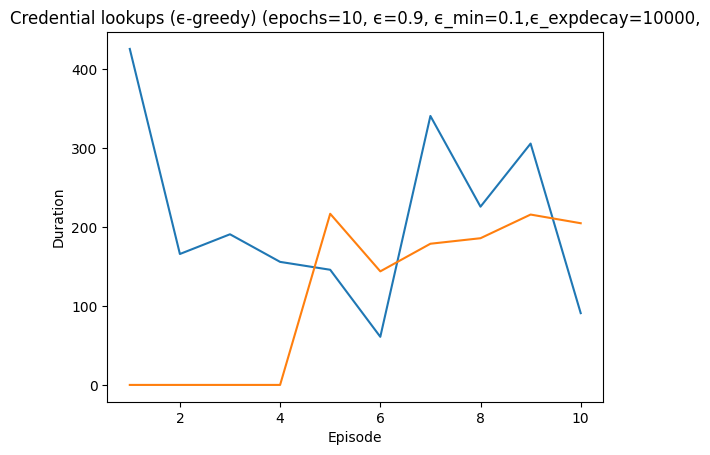

In [6]:
credlookup_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [7]:
import matplotlib

# Plots
all_runs = [credlookup_run, dqn_with_defender, dql_exploit_run]
p.plot_averaged_cummulative_rewards(all_runs=all_runs, title=f"Attacker agents vs Basic Defender -- rewards\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", show=False)

In [8]:
# p.plot_episodes_length(all_runs)
p.plot_averaged_availability(title=f"Attacker agents vs Basic Defender -- availability\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", all_runs=all_runs, show=False)

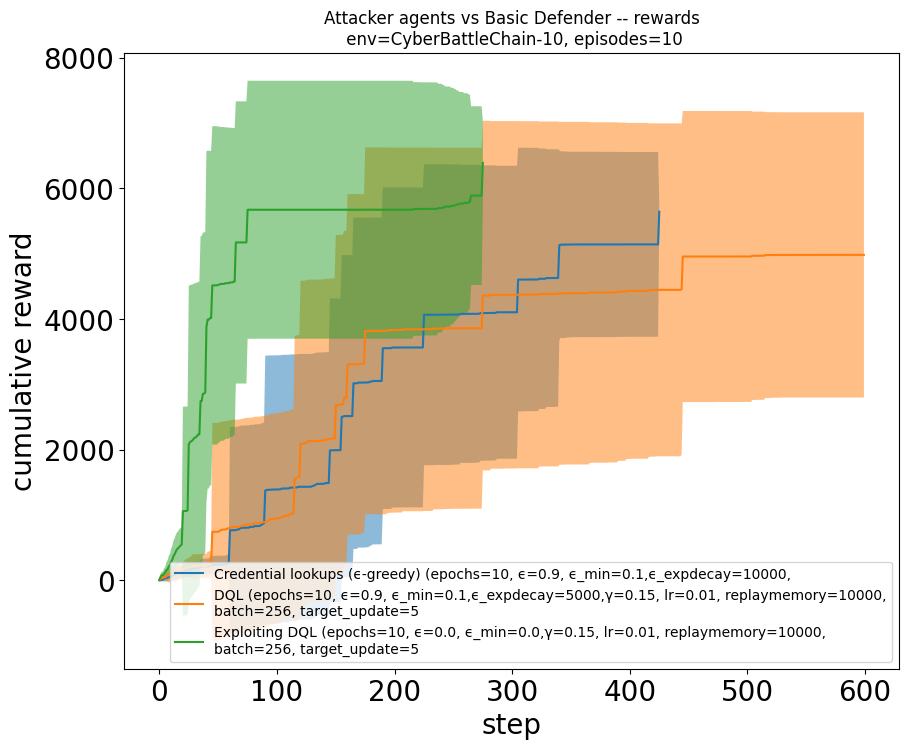

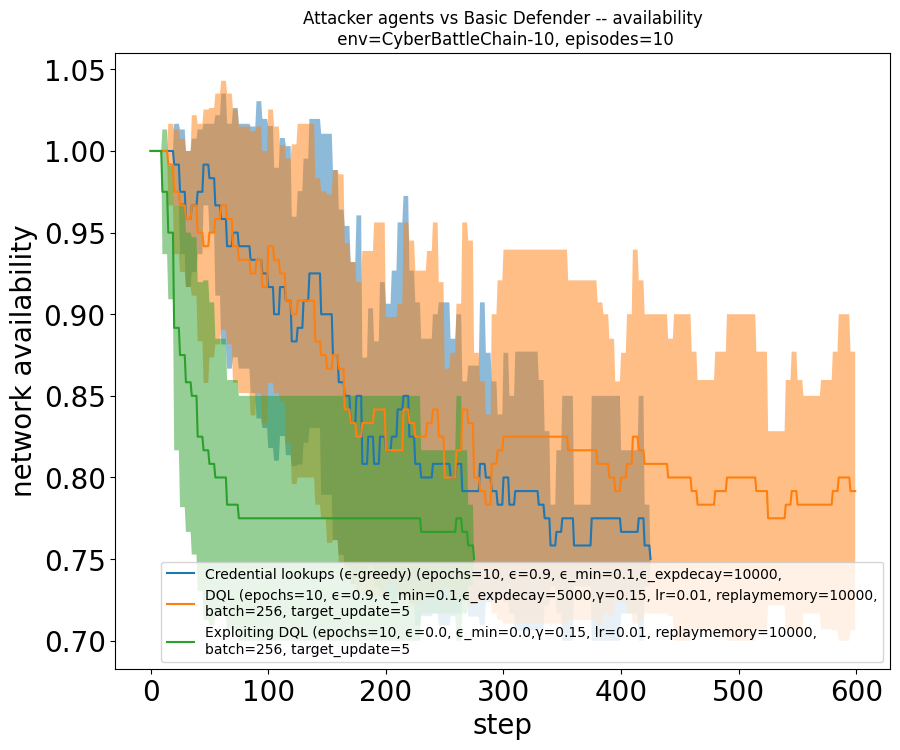

In [9]:
import os

os.makedirs(plots_dir, exist_ok=True)
matplotlib.pyplot.savefig(os.path.join(plots_dir, "withdefender-finalplot.png"))
matplotlib.pyplot.show()